Import library:

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import itertools
import seaborn as sns
from sklearn.tree import plot_tree
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import gdown

## 1. Data:

In [115]:
# C1: tự động tải và load data
file_id = '1GU-ty9O5bmLGvXfvJj6SuQ-UyHb9RTh9'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'data.csv'

gdown.download(url, output, quiet=False)
data = pd.read_csv('data.csv')

X, y = data.drop('HeartDiseaseorAttack', axis=1), data['HeartDiseaseorAttack']
data.head()

Downloading...
From: https://drive.google.com/uc?id=1GU-ty9O5bmLGvXfvJj6SuQ-UyHb9RTh9
To: c:\Users\ADMIN\OneDrive\Machine Learning\machine_learning\final_term\data.csv
100%|██████████| 22.7M/22.7M [00:10<00:00, 2.25MB/s]


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# C2: tải file data về thư mục và load data

data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
X, y = data.drop('HeartDiseaseorAttack', axis=1), data['HeartDiseaseorAttack']
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Train test split:

In [11]:
# 80% train 20% val
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)
print(X_train1.shape, X_val1.shape)
print(y_train1.shape, y_val1.shape)

(202944, 21) (50736, 21)
(202944,) (50736,)


In [4]:
# 70% train 30% val
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
print(X_train2.shape, X_val2.shape)
print(y_train2.shape, y_val2.shape)

(177576, 21) (76104, 21)
(177576,) (76104,)


In [5]:
# 60% train 40% val
X_train3, X_val3, y_train3, y_val3 = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)
print(X_train3.shape, X_val3.shape)
print(y_train3.shape, y_val3.shape)

(152208, 21) (101472, 21)
(152208,) (101472,)


## 2. Model

#### 2.1. Decision tree

##### Baseline:

In [7]:
# 80% train, 20% val
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train1)
X_val_scaled = std_scaler.transform(X_val1)

dtree = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
dtree.fit(X_train_scaled, y_train1)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

Độ sâu của cây: 44
Số lượng lá: 35448


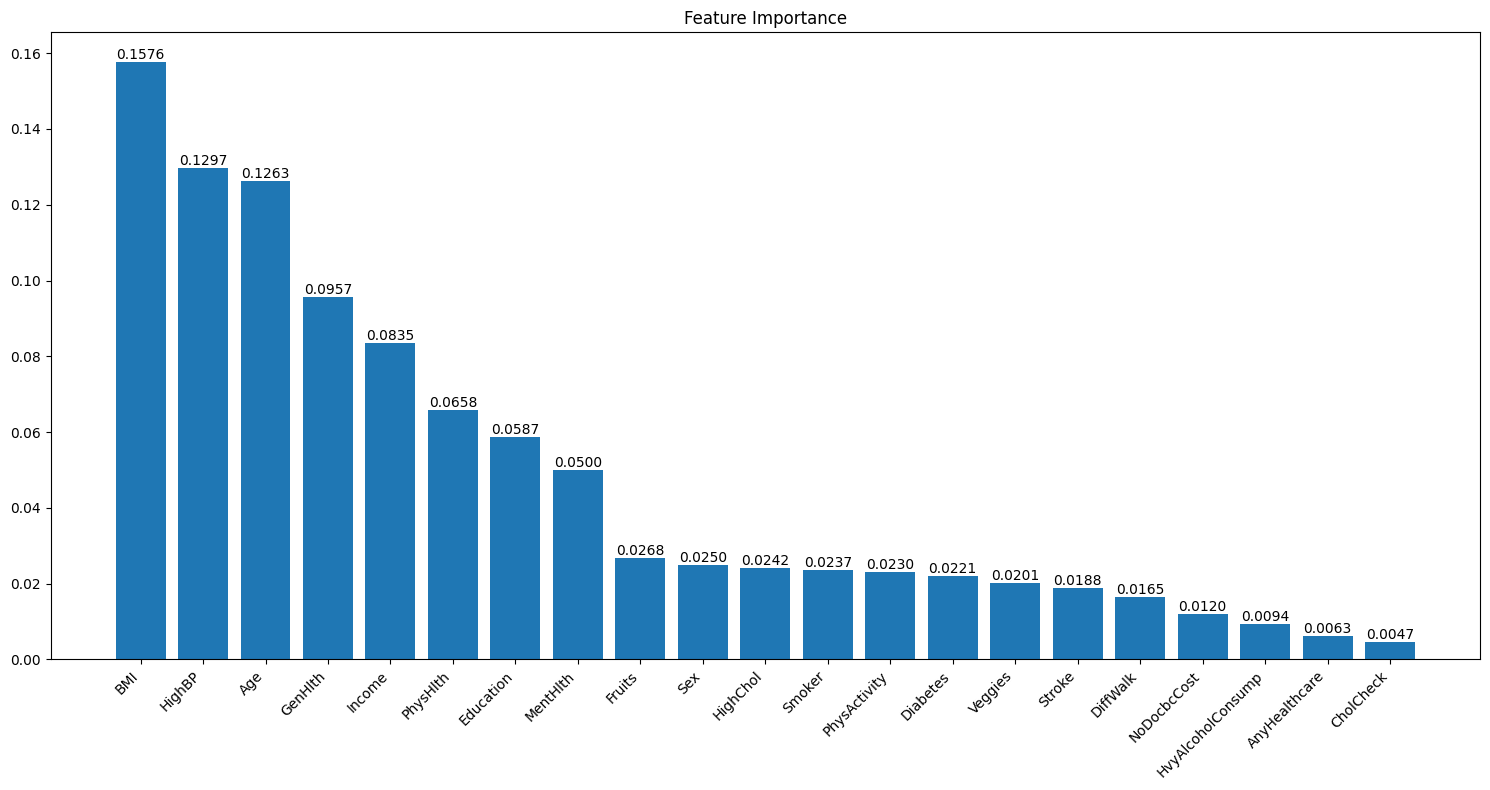

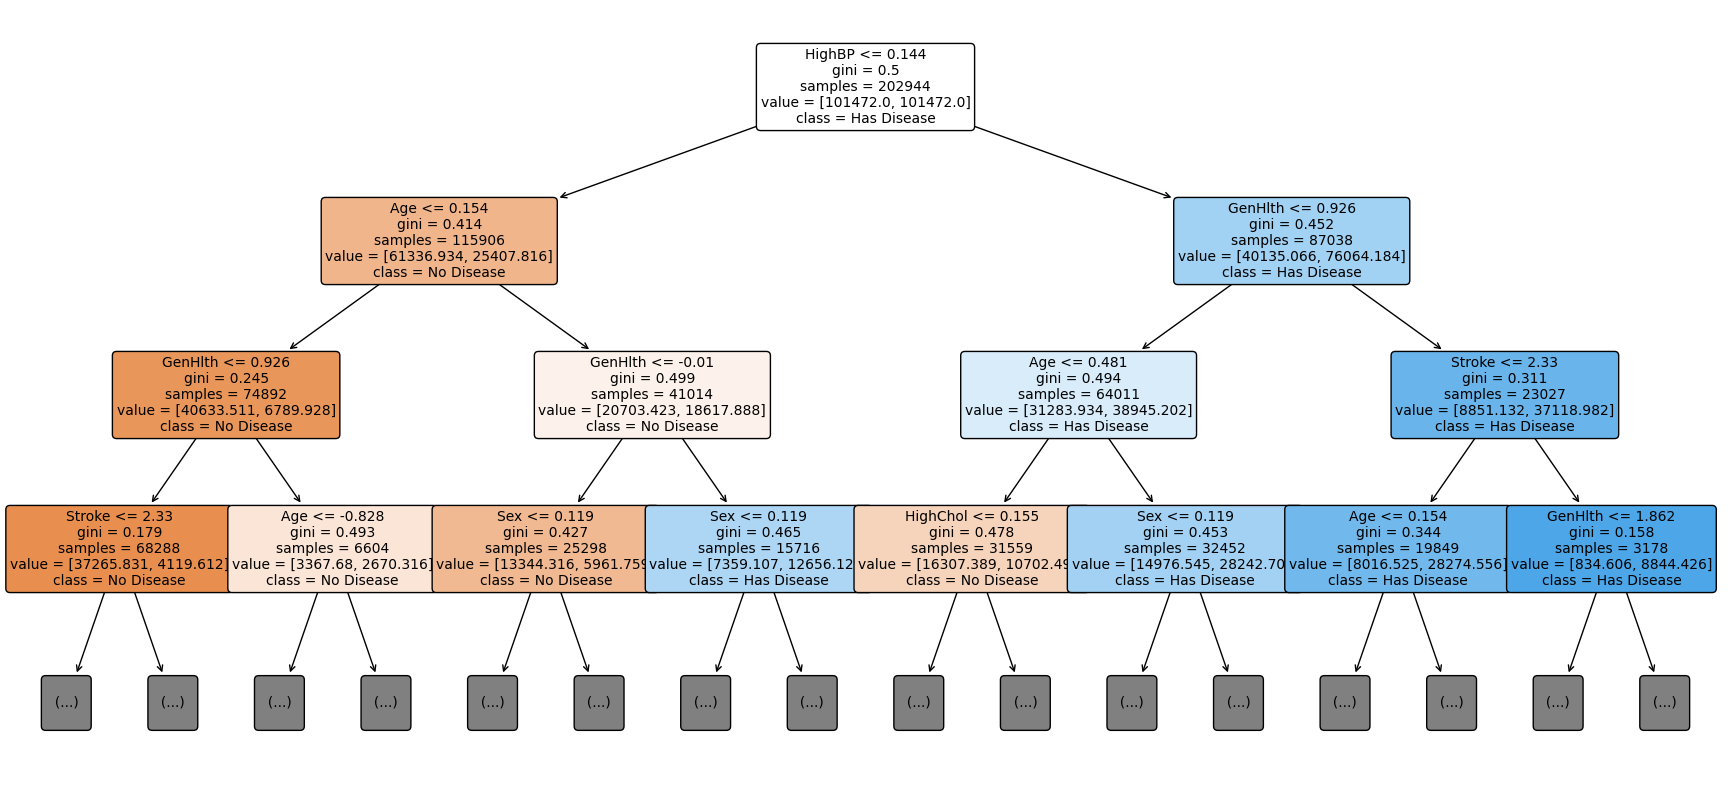

In [8]:
# độ sâu
print(f"Độ sâu của cây: {dtree.get_depth()}")

# số lá
print(f"Số lượng lá: {dtree.get_n_leaves()}")

# độ quan trọng của đặc trưng
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dtree.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(15, 8))  # tăng kích thước để dễ nhìn hơn
bars = plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')

# Thêm giá trị số lên trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',  # hiển thị 4 chữ số thập phân
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# hiển thị cây, với một độ sâu nhất định
plt.figure(figsize=(22, 10))
plot_tree(dtree, 
          max_depth=3,  # chỉ hiển thị 3 level đầu tiên
          feature_names=X.columns,
          class_names=['No Disease', 'Has Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [9]:
# evaluate
y_pred_train1 = dtree.predict(X_train_scaled)
print('On train set:')
print(classification_report(y_train1, y_pred_train1))

y_pred_val1 = dtree.predict(X_val_scaled)
print('On test set:')
print(classification_report(y_val1, y_pred_val1))

On train set:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    183830
         1.0       0.93      1.00      0.96     19114

    accuracy                           0.99    202944
   macro avg       0.97      1.00      0.98    202944
weighted avg       0.99      0.99      0.99    202944

On test set:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     45957
         1.0       0.24      0.25      0.24      4779

    accuracy                           0.85     50736
   macro avg       0.58      0.58      0.58     50736
weighted avg       0.86      0.85      0.85     50736



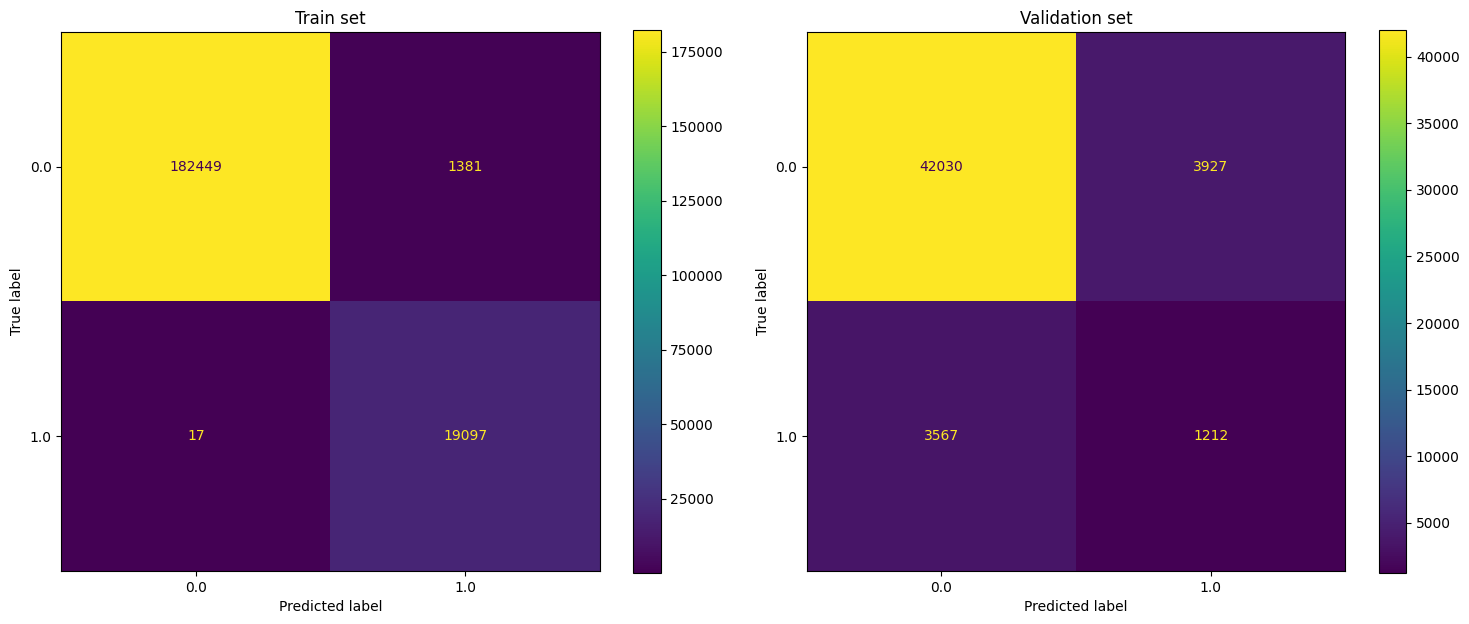

In [10]:
# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_train1, y_pred_train1, ax=ax[0])
ax[0].set_title('Train set')
ConfusionMatrixDisplay.from_predictions(y_val1, y_pred_val1, ax=ax[1])
ax[1].set_title('Validation set')
plt.tight_layout()
plt.show()

- Mô hình gặp hiện tượng overfitting do cây đang quá phức tạp
-> Cần tỉa cây

##### Post-pruning tree:

In [22]:
dtree_full = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
path = dtree_full.cost_complexity_pruning_path(X_train_scaled, y_train1)
alphas = path.ccp_alphas
alphas = alphas[alphas > 4e-5] # lọc bỏ những giá trị alpha âm hoặc quá nhỏ

# tìm alpha tối ưu bằng cross-validation
alpha_scores = []
depths = []
n_leaves = []
for alpha in alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, class_weight='balanced')
    scores = cross_val_score(tree, X_train_scaled, y_train1, cv=5, scoring='f1', n_jobs=-1)
    alpha_scores.append(np.mean(scores))
    tree.fit(X_train_scaled, y_train1)
    depths.append(tree.get_depth())
    n_leaves.append(tree.get_n_leaves())

# Chọn alpha tốt nhất
best_alpha = alphas[np.argmax(alpha_scores)]
print(f"Best alpha: {best_alpha}")

Best alpha: 0.00019168045066418268


In [ ]:
# do quá trình tuning rất tốn kém nên lưu lại alpha để dùng cho lần sau
best_alpha = 0.00019168045066418268

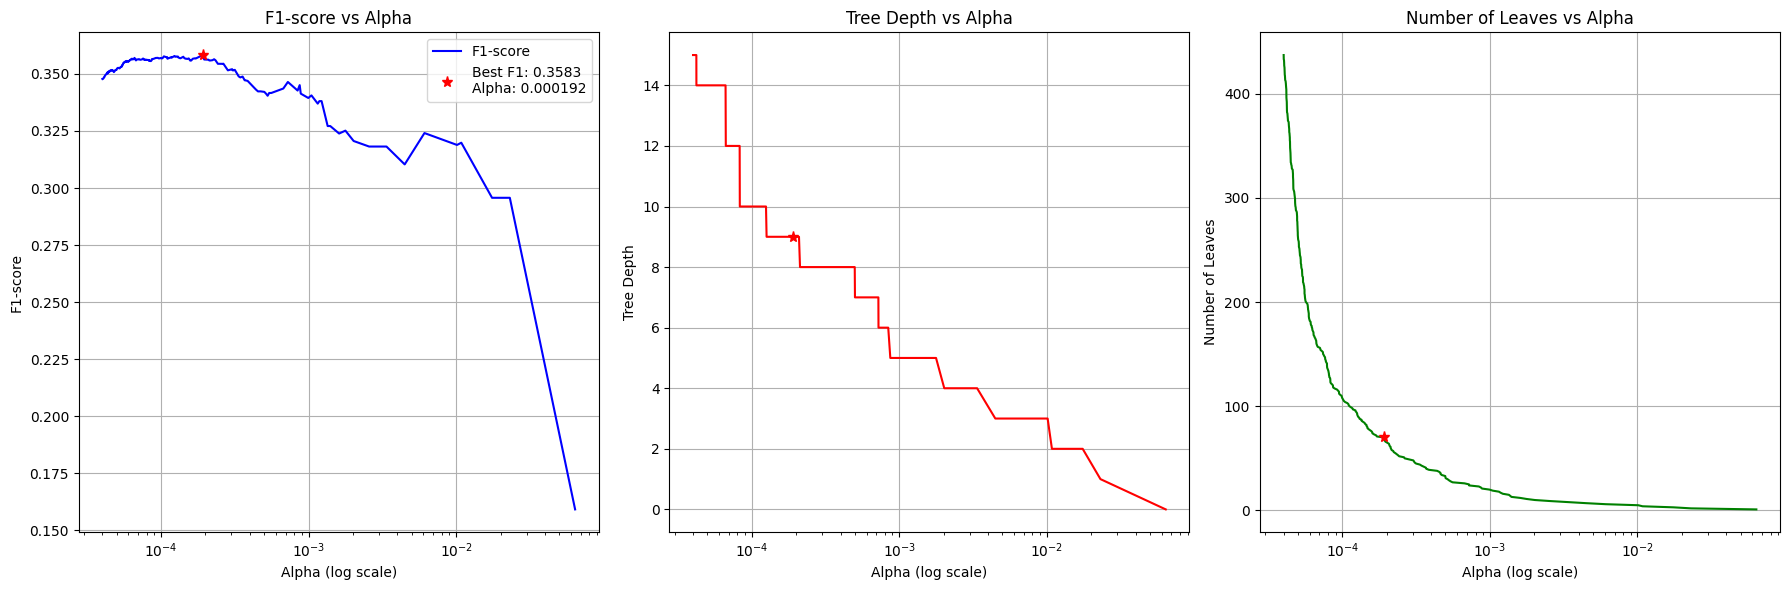

Best alpha: 0.00019168045066418268
Best F1-score: 0.3583
Corresponding depth: 9
Corresponding number of leaves: 70


In [23]:
# Tạo figure với 3 subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot F1-score với trục x log và đánh dấu điểm tối ưu
best_idx = np.argmax(alpha_scores)
ax1.semilogx(alphas, alpha_scores, 'b-', label='F1-score')
ax1.plot(alphas[best_idx], alpha_scores[best_idx], 'r*', markersize=8, 
         label=f'Best F1: {alpha_scores[best_idx]:.4f}\nAlpha: {alphas[best_idx]:.6f}')
ax1.set_xlabel('Alpha (log scale)')
ax1.set_ylabel('F1-score')
ax1.set_title('F1-score vs Alpha')
ax1.grid(True)
ax1.legend()

# Plot Tree depth với trục x log
ax2.semilogx(alphas, depths, 'r-')
ax2.plot(alphas[best_idx], depths[best_idx], 'r*', markersize=8)
ax2.set_xlabel('Alpha (log scale)')
ax2.set_ylabel('Tree Depth')
ax2.set_title('Tree Depth vs Alpha')
ax2.grid(True)

# Plot Number of leaves với trục x log
ax3.semilogx(alphas, n_leaves, 'g-')
ax3.plot(alphas[best_idx], n_leaves[best_idx], 'r*', markersize=8)
ax3.set_xlabel('Alpha (log scale)')
ax3.set_ylabel('Number of Leaves')
ax3.set_title('Number of Leaves vs Alpha')
ax3.grid(True)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

# In giá trị alpha tốt nhất và các metric tương ứng
print(f"Best alpha: {best_alpha}")
print(f"Best F1-score: {max(alpha_scores):.4f}")
print(f"Corresponding depth: {depths[np.argmax(alpha_scores)]}")
print(f"Corresponding number of leaves: {n_leaves[np.argmax(alpha_scores)]}")


After pruning:
Tree depth: 9
Number of leaves: 70

Model performance after pruning:
On train set:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.82    183830
         1.0       0.23      0.82      0.36     19114

    accuracy                           0.72    202944
   macro avg       0.60      0.77      0.59    202944
weighted avg       0.90      0.72      0.78    202944


On validation set:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     45957
         1.0       0.22      0.81      0.35      4779

    accuracy                           0.72     50736
   macro avg       0.60      0.76      0.59     50736
weighted avg       0.90      0.72      0.78     50736



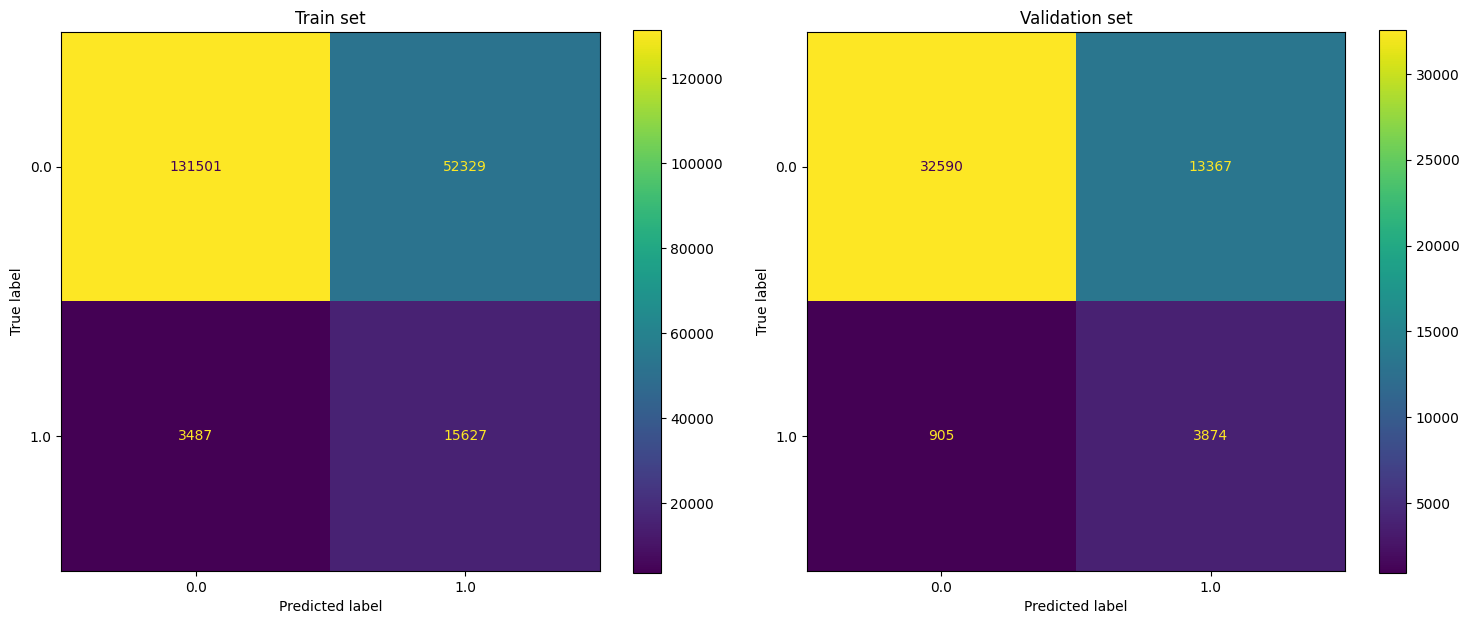

In [24]:
# train mô hình với alpha đã chọn
pruned_tree = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_alpha, class_weight='balanced')
pruned_tree.fit(X_train_scaled, y_train1)

# độ sâu và số lá trước và sau khi tỉa
print("\nAfter pruning:")
print(f"Tree depth: {pruned_tree.get_depth()}")
print(f"Number of leaves: {pruned_tree.get_n_leaves()}")

# đánh giá model sau khi tỉa
y_pred_train = pruned_tree.predict(X_train_scaled)
y_pred_val = pruned_tree.predict(X_val_scaled)

print("\nModel performance after pruning:")
print('On train set:')
print(classification_report(y_train1, y_pred_train))
print('\nOn validation set:')
print(classification_report(y_val1, y_pred_val))

# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15, 6))
ConfusionMatrixDisplay.from_predictions(y_train1, y_pred_train, ax=ax[0])
ax[0].set_title('Train set')
ConfusionMatrixDisplay.from_predictions(y_val1, y_pred_val, ax=ax[1])
ax[1].set_title('Validation set')
plt.tight_layout()
plt.show()

- Việc tỉa cây giúp giảm đáng kể độ phức tạp của cây và cải thiện tình trạng overfitting

##### Resampling and tree pruning

Random Over-sampling:

In [33]:
# SMOTE
over_sampler = RandomOverSampler(sampling_strategy='auto')
X_train_smote1, y_train_ros1 = over_sampler.fit_resample(X_train1, y_train1)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train_ros1)
X_val_scaled = std_scaler.transform(X_val1)

dtree = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
dtree.fit(X_train_scaled, y_train_ros1)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

Độ sâu của cây: 43
Số lượng lá: 29682


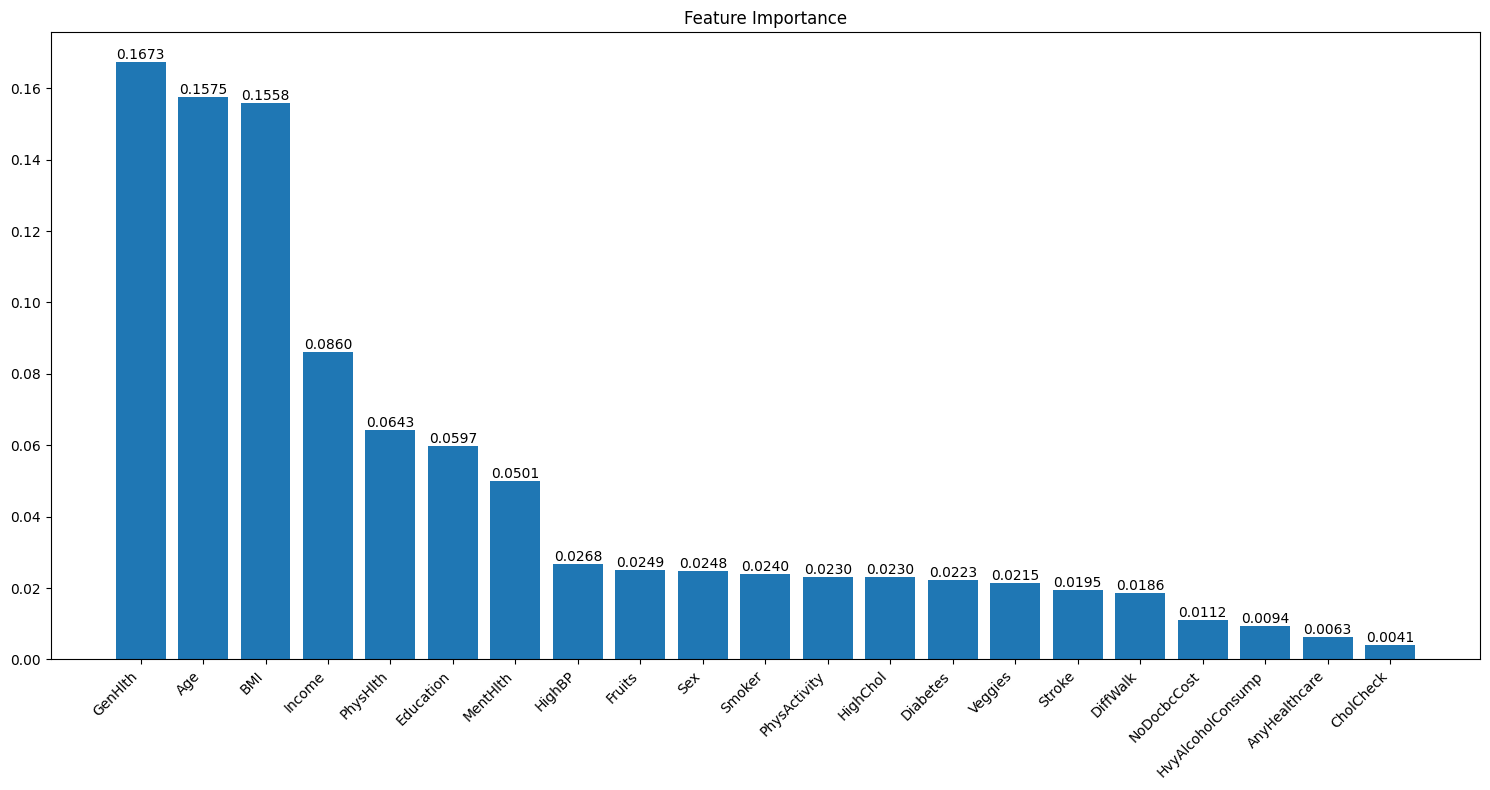

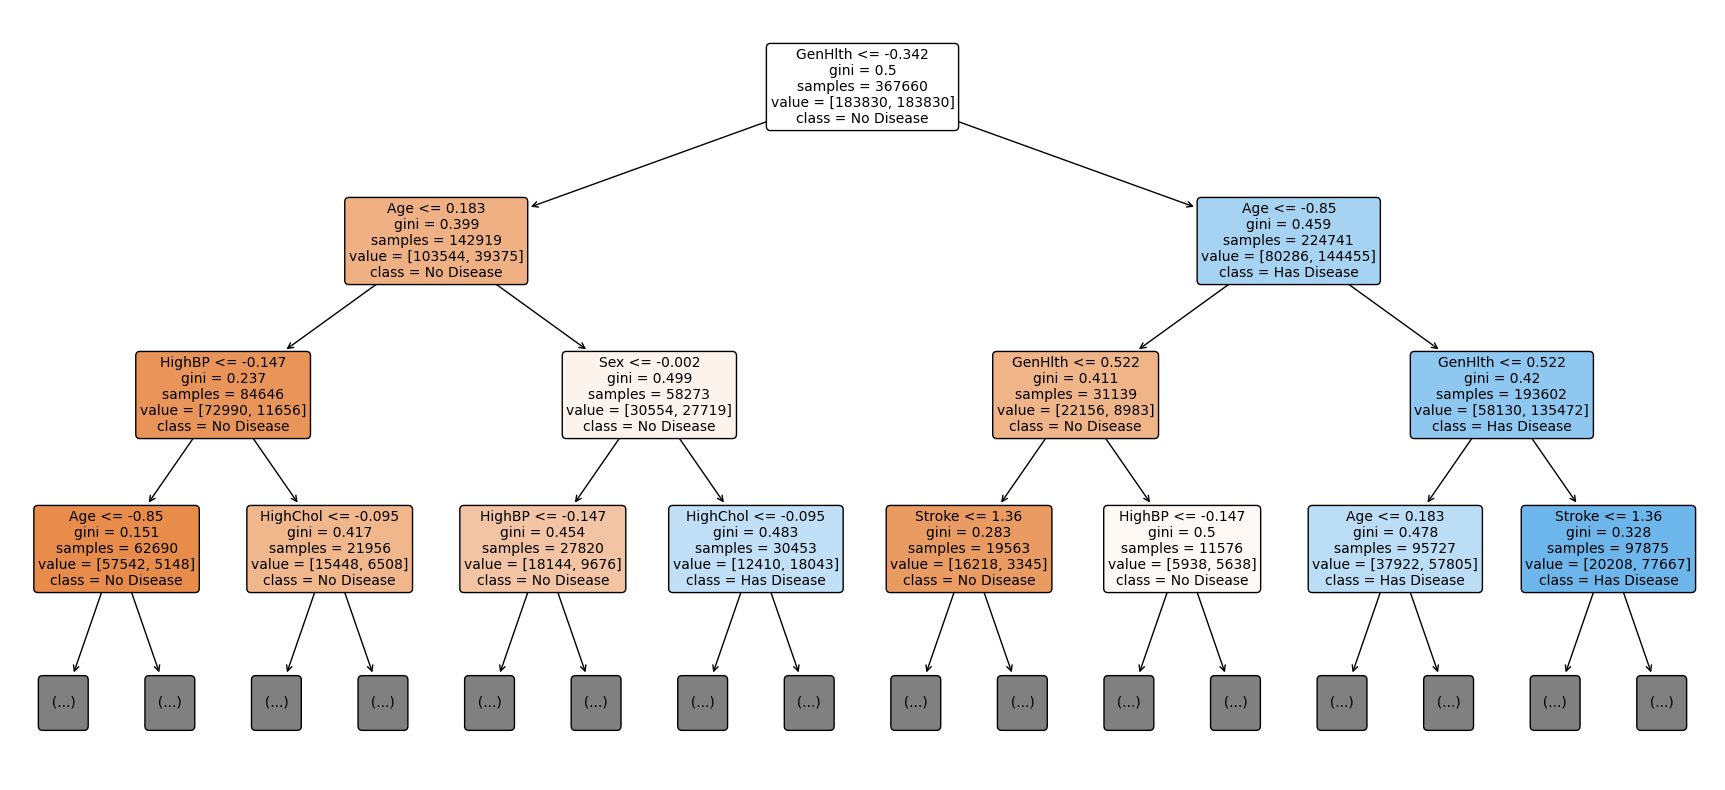

In [34]:
# độ sâu
print(f"Độ sâu của cây: {dtree.get_depth()}")

# số lá
print(f"Số lượng lá: {dtree.get_n_leaves()}")

# độ quan trọng của đặc trưng
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dtree.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(15, 8))  # tăng kích thước để dễ nhìn hơn
bars = plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')

# Thêm giá trị số lên trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',  # hiển thị 4 chữ số thập phân
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# hiển thị cây, với một độ sâu nhất định
plt.figure(figsize=(22, 10))
plot_tree(dtree, 
          max_depth=3,  # chỉ hiển thị 3 level đầu tiên
          feature_names=X.columns,
          class_names=['No Disease', 'Has Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [35]:
# evaluate
y_pred_train1 = dtree.predict(X_train_scaled)
print('On train set:')
print(classification_report(y_train_ros1, y_pred_train1))

y_pred_val1 = dtree.predict(X_val_scaled)
print('On test set:')
print(classification_report(y_val1, y_pred_val1))

On train set:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    183830
         1.0       0.99      1.00      1.00    183830

    accuracy                           1.00    367660
   macro avg       1.00      1.00      1.00    367660
weighted avg       1.00      1.00      1.00    367660

On test set:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     45957
         1.0       0.23      0.25      0.24      4779

    accuracy                           0.85     50736
   macro avg       0.58      0.58      0.58     50736
weighted avg       0.86      0.85      0.85     50736



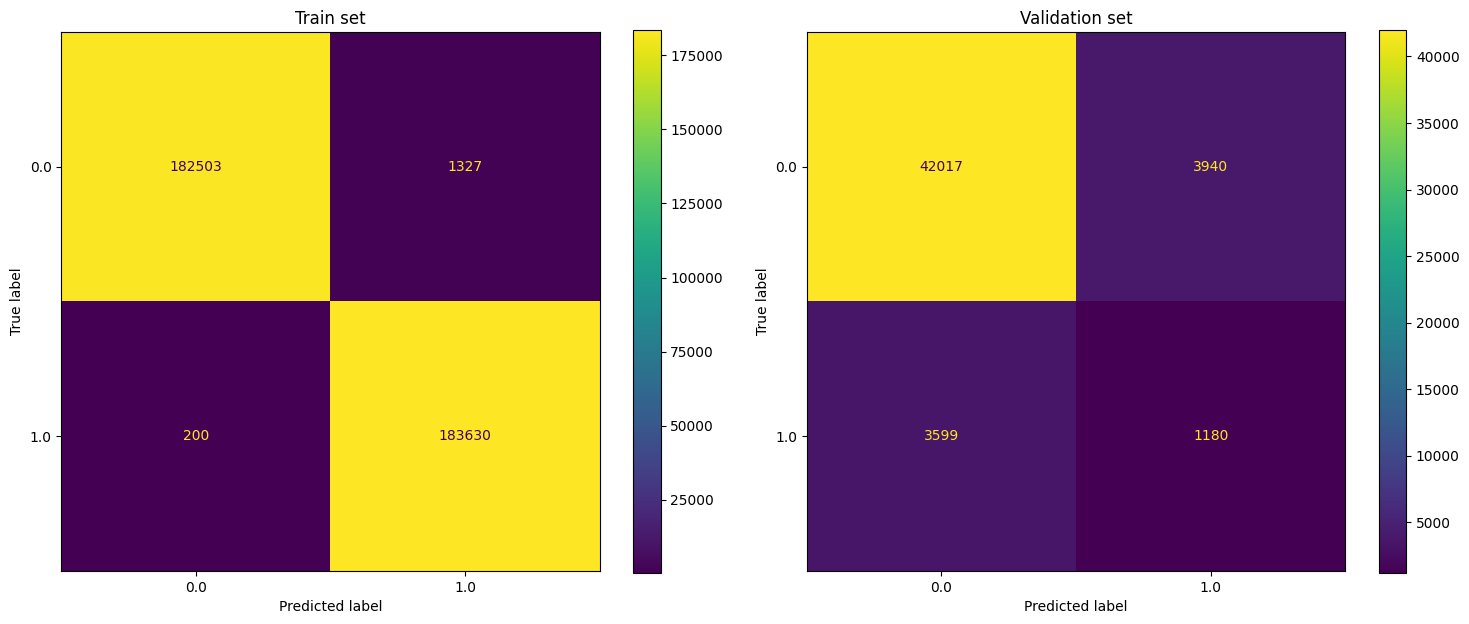

In [36]:
# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_train_ros1, y_pred_train1, ax=ax[0])
ax[0].set_title('Train set')
ConfusionMatrixDisplay.from_predictions(y_val1, y_pred_val1, ax=ax[1])
ax[1].set_title('Validation set')
plt.tight_layout()
plt.show()

In [37]:
# post pruning
dtree_full = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
path = dtree_full.cost_complexity_pruning_path(X_train_scaled, y_train_ros1)
alphas = path.ccp_alphas
alphas = alphas[alphas > 4e-5] # lọc bỏ những giá trị alpha âm hoặc quá nhỏ

# tìm alpha tối ưu bằng cross-validation
alpha_scores = []
depths = []
n_leaves = []
for alpha in alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, class_weight='balanced')
    scores = cross_val_score(tree, X_train_scaled, y_train_ros1, cv=5, scoring='f1')
    alpha_scores.append(np.mean(scores))
    tree.fit(X_train_scaled, y_train_ros1)
    depths.append(tree.get_depth())
    n_leaves.append(tree.get_n_leaves())

# Chọn alpha tốt nhất
best_alpha = alphas[np.argmax(alpha_scores)]
print(f"Best alpha: {best_alpha}")

Best alpha: 4.009138194034721e-05


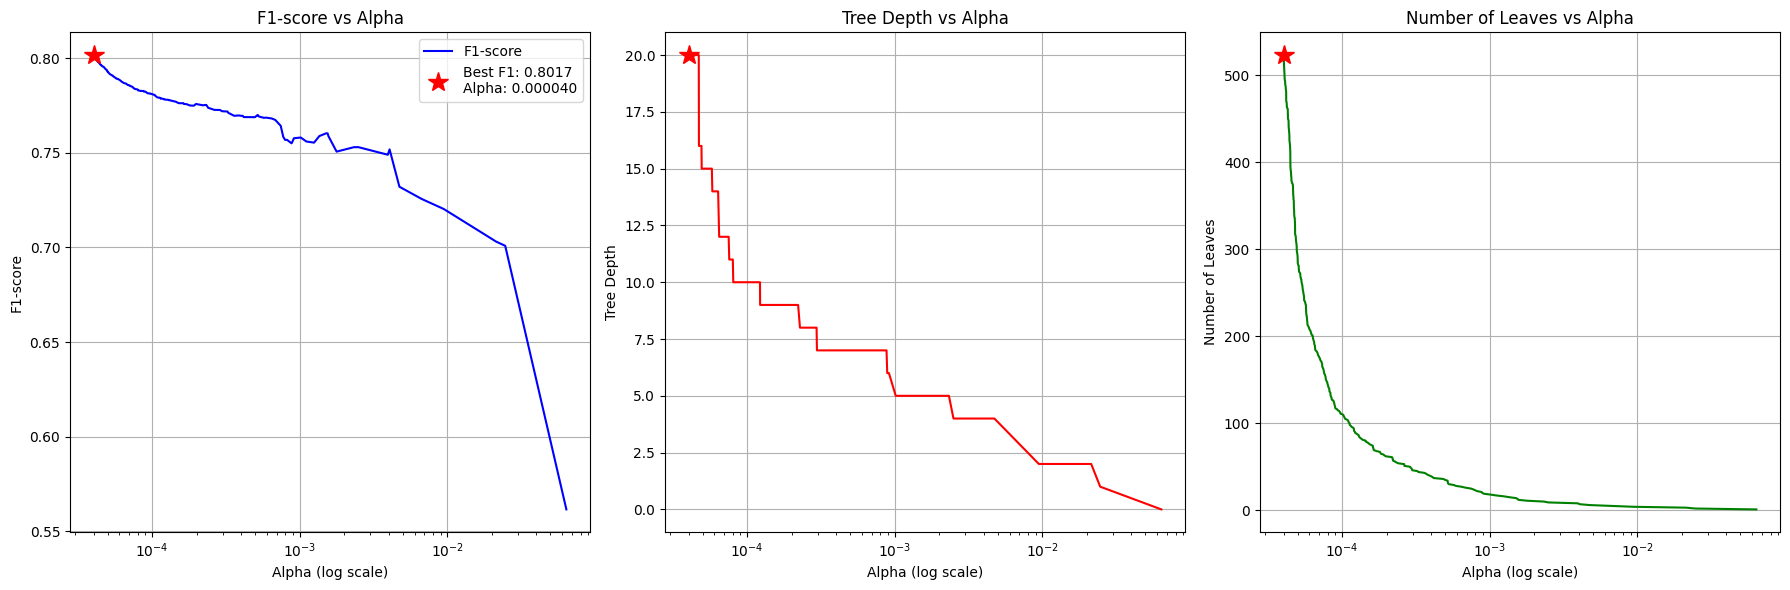

Best alpha: 4.009138194034721e-05
Best F1-score: 0.8017
Corresponding depth: 20
Corresponding number of leaves: 523


In [38]:
# Tạo figure với 3 subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot F1-score với trục x log và đánh dấu điểm tối ưu
best_idx = np.argmax(alpha_scores)
ax1.semilogx(alphas, alpha_scores, 'b-', label='F1-score')
ax1.plot(alphas[best_idx], alpha_scores[best_idx], 'r*', markersize=15, 
         label=f'Best F1: {alpha_scores[best_idx]:.4f}\nAlpha: {alphas[best_idx]:.6f}')
ax1.set_xlabel('Alpha (log scale)')
ax1.set_ylabel('F1-score')
ax1.set_title('F1-score vs Alpha')
ax1.grid(True)
ax1.legend()

# Plot Tree depth với trục x log
ax2.semilogx(alphas, depths, 'r-')
ax2.plot(alphas[best_idx], depths[best_idx], 'r*', markersize=15)
ax2.set_xlabel('Alpha (log scale)')
ax2.set_ylabel('Tree Depth')
ax2.set_title('Tree Depth vs Alpha')
ax2.grid(True)

# Plot Number of leaves với trục x log
ax3.semilogx(alphas, n_leaves, 'g-')
ax3.plot(alphas[best_idx], n_leaves[best_idx], 'r*', markersize=15)
ax3.set_xlabel('Alpha (log scale)')
ax3.set_ylabel('Number of Leaves')
ax3.set_title('Number of Leaves vs Alpha')
ax3.grid(True)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

# In giá trị alpha tốt nhất và các metric tương ứng
print(f"Best alpha: {best_alpha}")
print(f"Best F1-score: {max(alpha_scores):.4f}")
print(f"Corresponding depth: {depths[np.argmax(alpha_scores)]}")
print(f"Corresponding number of leaves: {n_leaves[np.argmax(alpha_scores)]}")


After pruning:
Tree depth: 20
Number of leaves: 523

Model performance after pruning:
On train set:
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.77    183830
         1.0       0.75      0.86      0.80    183830

    accuracy                           0.79    367660
   macro avg       0.80      0.79      0.79    367660
weighted avg       0.80      0.79      0.79    367660


On validation set:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     45957
         1.0       0.22      0.81      0.35      4779

    accuracy                           0.72     50736
   macro avg       0.60      0.76      0.58     50736
weighted avg       0.90      0.72      0.77     50736



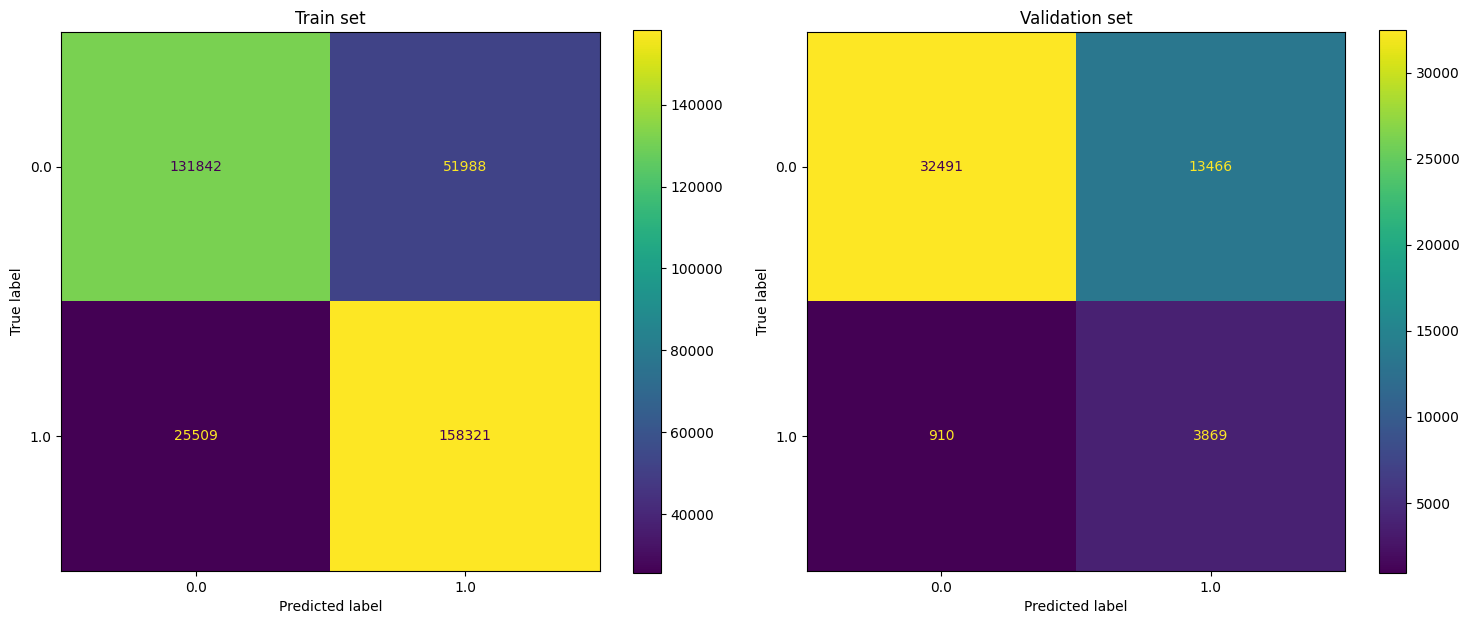

In [39]:
# train mô hình với alpha đã chọn
pruned_tree = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_alpha, class_weight='balanced')
pruned_tree.fit(X_train_scaled, y_train_ros1)

# độ sâu và số lá trước và sau khi tỉa
print("\nAfter pruning:")
print(f"Tree depth: {pruned_tree.get_depth()}")
print(f"Number of leaves: {pruned_tree.get_n_leaves()}")

# đánh giá model sau khi tỉa
y_pred_train = pruned_tree.predict(X_train_scaled)
y_pred_val = pruned_tree.predict(X_val_scaled)

print("\nModel performance after pruning:")
print('On train set:')
print(classification_report(y_train_ros1, y_pred_train))
print('\nOn validation set:')
print(classification_report(y_val1, y_pred_val))

# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15, 6))
ConfusionMatrixDisplay.from_predictions(y_train_ros1, y_pred_train, ax=ax[0])
ax[0].set_title('Train set')
ConfusionMatrixDisplay.from_predictions(y_val1, y_pred_val, ax=ax[1])
ax[1].set_title('Validation set')
plt.tight_layout()
plt.show()

SMOTE:

In [26]:
# SMOTE
over_sampler = SMOTE(sampling_strategy='auto')
X_train_smote1, y_train_smote1 = over_sampler.fit_resample(X_train1, y_train1)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train_smote1)
X_val_scaled = std_scaler.transform(X_val1)

dtree = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
dtree.fit(X_train_scaled, y_train_smote1)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

Độ sâu của cây: 47
Số lượng lá: 30086


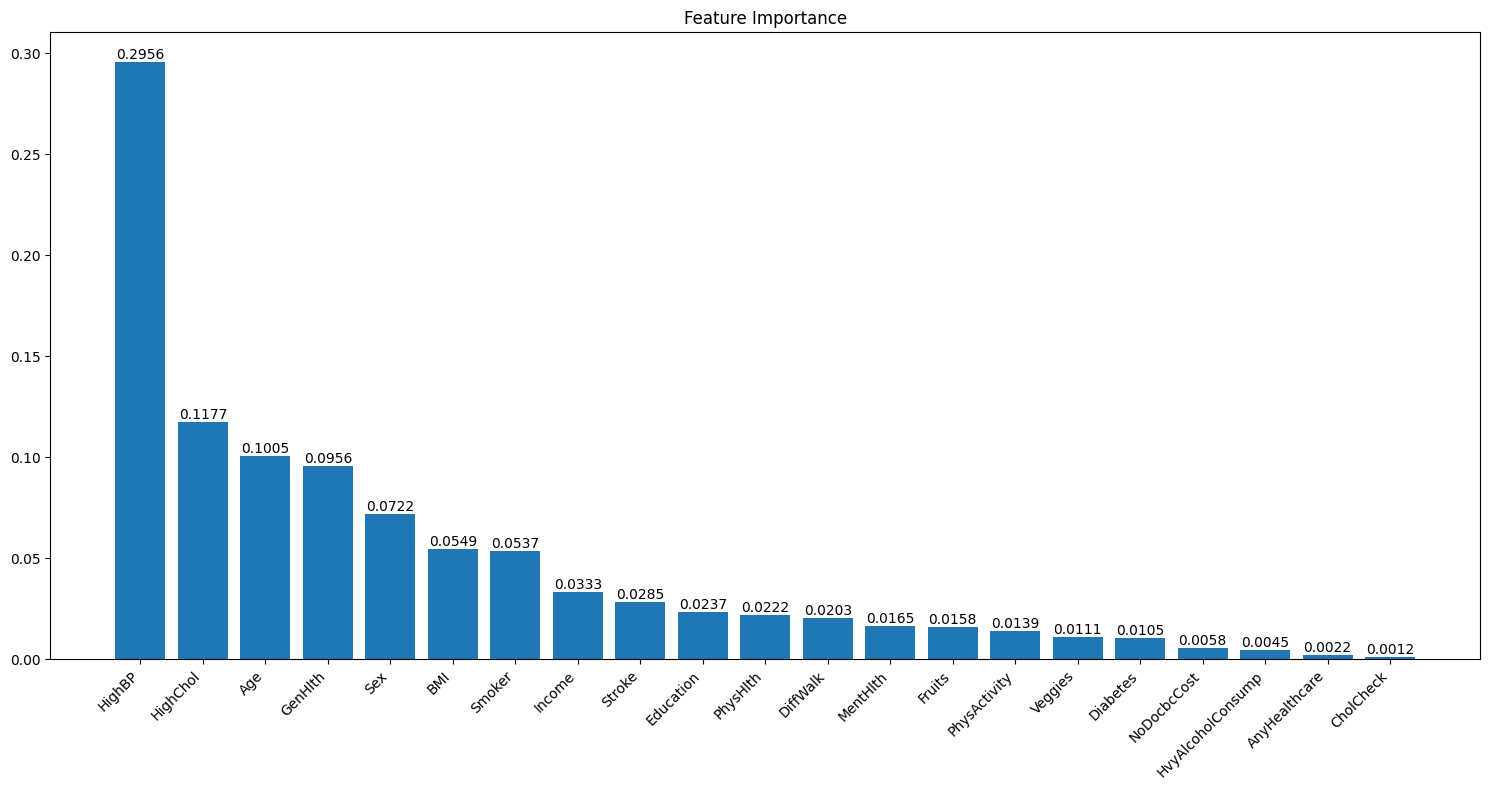

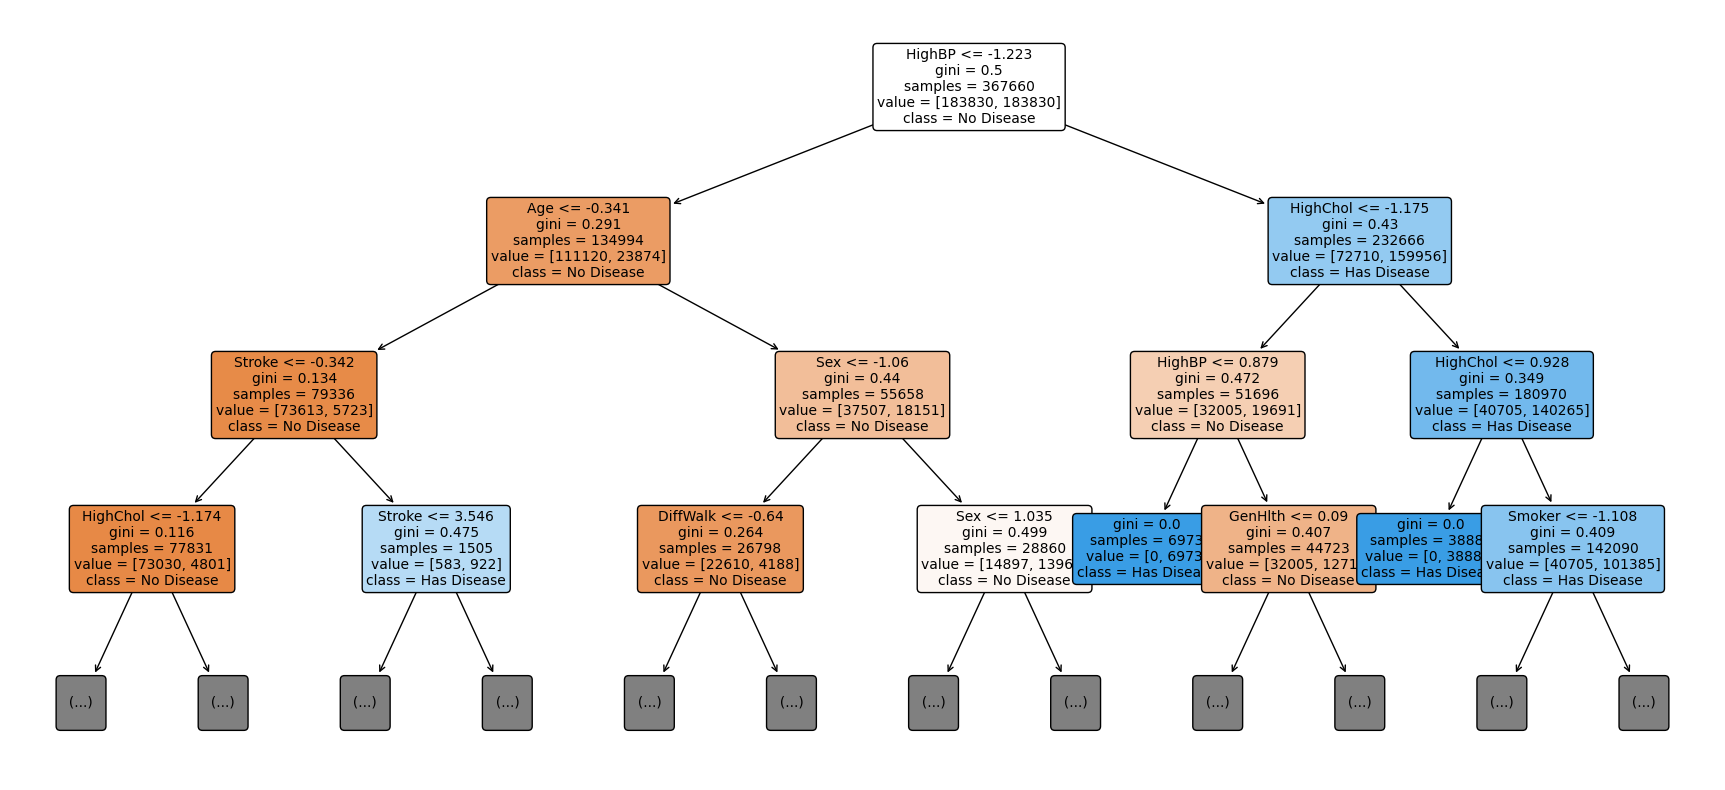

In [27]:
# độ sâu
print(f"Độ sâu của cây: {dtree.get_depth()}")

# số lá
print(f"Số lượng lá: {dtree.get_n_leaves()}")

# độ quan trọng của đặc trưng
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dtree.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(15, 8))  # tăng kích thước để dễ nhìn hơn
bars = plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')

# Thêm giá trị số lên trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',  # hiển thị 4 chữ số thập phân
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# hiển thị cây, với một độ sâu nhất định
plt.figure(figsize=(22, 10))
plot_tree(dtree, 
          max_depth=3,  # chỉ hiển thị 3 level đầu tiên
          feature_names=X.columns,
          class_names=['No Disease', 'Has Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [28]:
# evaluate
y_pred_train1 = dtree.predict(X_train_scaled)
print('On train set:')
print(classification_report(y_train_smote1, y_pred_train1))

y_pred_val1 = dtree.predict(X_val_scaled)
print('On test set:')
print(classification_report(y_val1, y_pred_val1))

On train set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    183830
         1.0       1.00      1.00      1.00    183830

    accuracy                           1.00    367660
   macro avg       1.00      1.00      1.00    367660
weighted avg       1.00      1.00      1.00    367660

On test set:


              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     45957
         1.0       0.24      0.28      0.26      4779

    accuracy                           0.85     50736
   macro avg       0.58      0.59      0.59     50736
weighted avg       0.86      0.85      0.85     50736



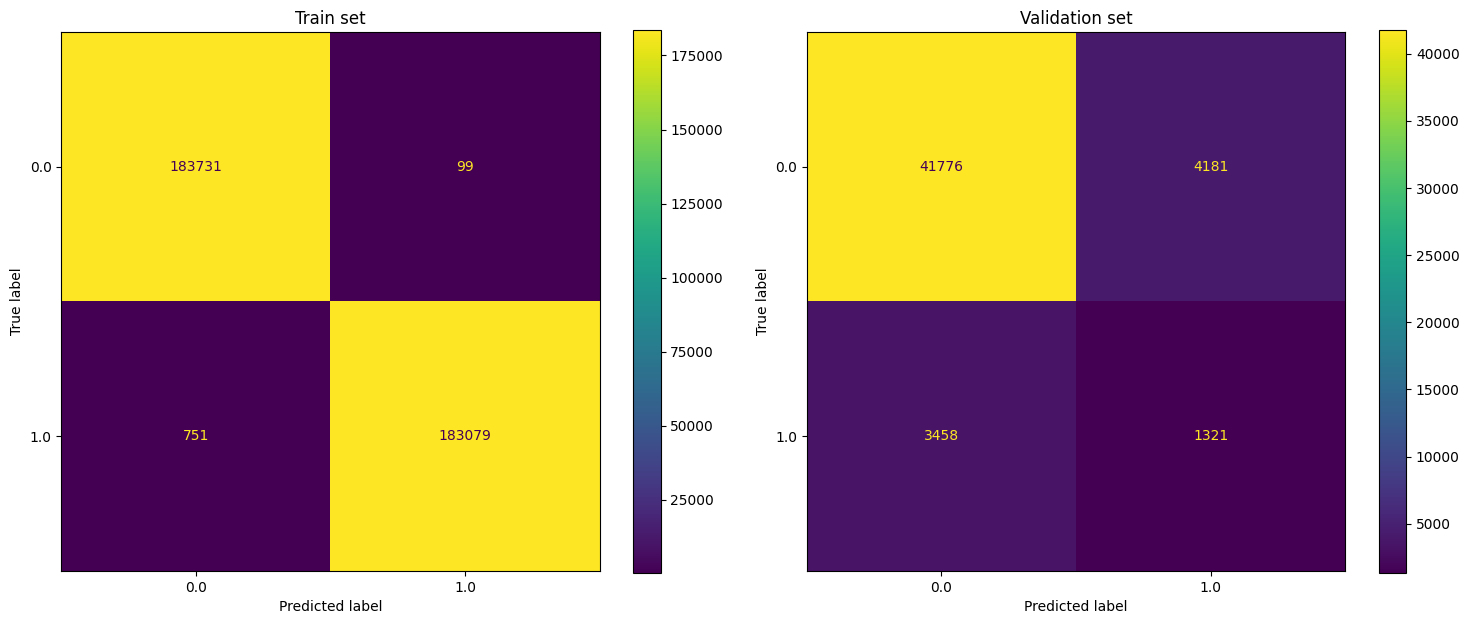

In [ ]:
# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_train_smote1, y_pred_train1, ax=ax[0])
ax[0].set_title('Train set')
ConfusionMatrixDisplay.from_predictions(y_val1, y_pred_val1, ax=ax[1])
ax[1].set_title('Validation set')
plt.tight_layout()
plt.show()

In [30]:
# post pruning
dtree_full = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
path = dtree_full.cost_complexity_pruning_path(X_train_scaled, y_train_smote1)
alphas = path.ccp_alphas
alphas = alphas[alphas > 4e-5] # lọc bỏ những giá trị alpha âm hoặc quá nhỏ

# tìm alpha tối ưu bằng cross-validation
alpha_scores = []
depths = []
n_leaves = []
for alpha in alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, class_weight='balanced')
    scores = cross_val_score(tree, X_train_scaled, y_train_smote1, cv=5, scoring='f1')
    alpha_scores.append(np.mean(scores))
    tree.fit(X_train_scaled, y_train_smote1)
    depths.append(tree.get_depth())
    n_leaves.append(tree.get_n_leaves())

# Chọn alpha tốt nhất
best_alpha = alphas[np.argmax(alpha_scores)]
print(f"Best alpha: {best_alpha}")

Best alpha: 4.0343755330683826e-05


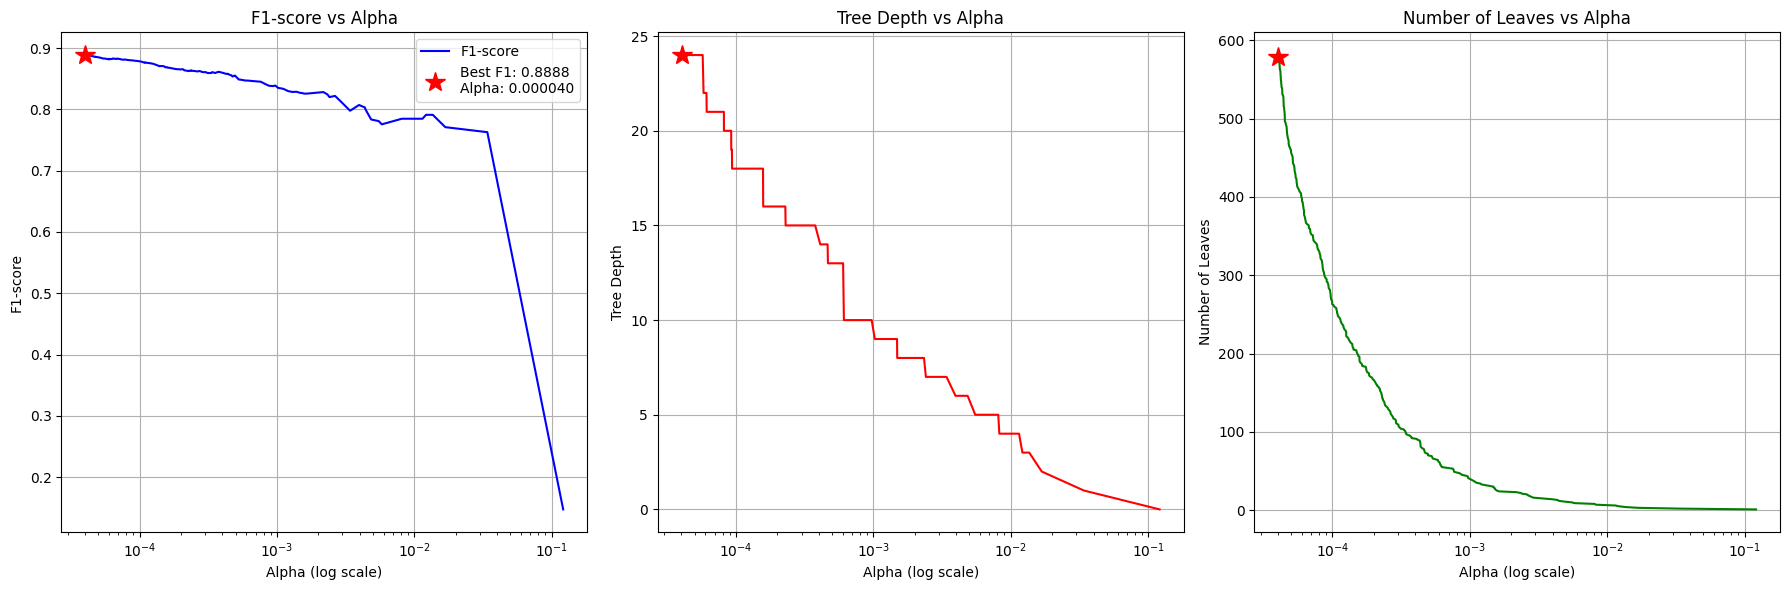

Best alpha: 4.0343755330683826e-05
Best F1-score: 0.8888
Corresponding depth: 24
Corresponding number of leaves: 579


In [31]:
# Tạo figure với 3 subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot F1-score với trục x log và đánh dấu điểm tối ưu
best_idx = np.argmax(alpha_scores)
ax1.semilogx(alphas, alpha_scores, 'b-', label='F1-score')
ax1.plot(alphas[best_idx], alpha_scores[best_idx], 'r*', markersize=15, 
         label=f'Best F1: {alpha_scores[best_idx]:.4f}\nAlpha: {alphas[best_idx]:.6f}')
ax1.set_xlabel('Alpha (log scale)')
ax1.set_ylabel('F1-score')
ax1.set_title('F1-score vs Alpha')
ax1.grid(True)
ax1.legend()

# Plot Tree depth với trục x log
ax2.semilogx(alphas, depths, 'r-')
ax2.plot(alphas[best_idx], depths[best_idx], 'r*', markersize=15)
ax2.set_xlabel('Alpha (log scale)')
ax2.set_ylabel('Tree Depth')
ax2.set_title('Tree Depth vs Alpha')
ax2.grid(True)

# Plot Number of leaves với trục x log
ax3.semilogx(alphas, n_leaves, 'g-')
ax3.plot(alphas[best_idx], n_leaves[best_idx], 'r*', markersize=15)
ax3.set_xlabel('Alpha (log scale)')
ax3.set_ylabel('Number of Leaves')
ax3.set_title('Number of Leaves vs Alpha')
ax3.grid(True)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

# In giá trị alpha tốt nhất và các metric tương ứng
print(f"Best alpha: {best_alpha}")
print(f"Best F1-score: {max(alpha_scores):.4f}")
print(f"Corresponding depth: {depths[np.argmax(alpha_scores)]}")
print(f"Corresponding number of leaves: {n_leaves[np.argmax(alpha_scores)]}")


After pruning:
Tree depth: 24
Number of leaves: 579

Model performance after pruning:
On train set:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92    183830
         1.0       0.95      0.88      0.92    183830

    accuracy                           0.92    367660
   macro avg       0.92      0.92      0.92    367660
weighted avg       0.92      0.92      0.92    367660


On validation set:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     45957
         1.0       0.39      0.27      0.32      4779

    accuracy                           0.89     50736
   macro avg       0.66      0.61      0.63     50736
weighted avg       0.88      0.89      0.88     50736



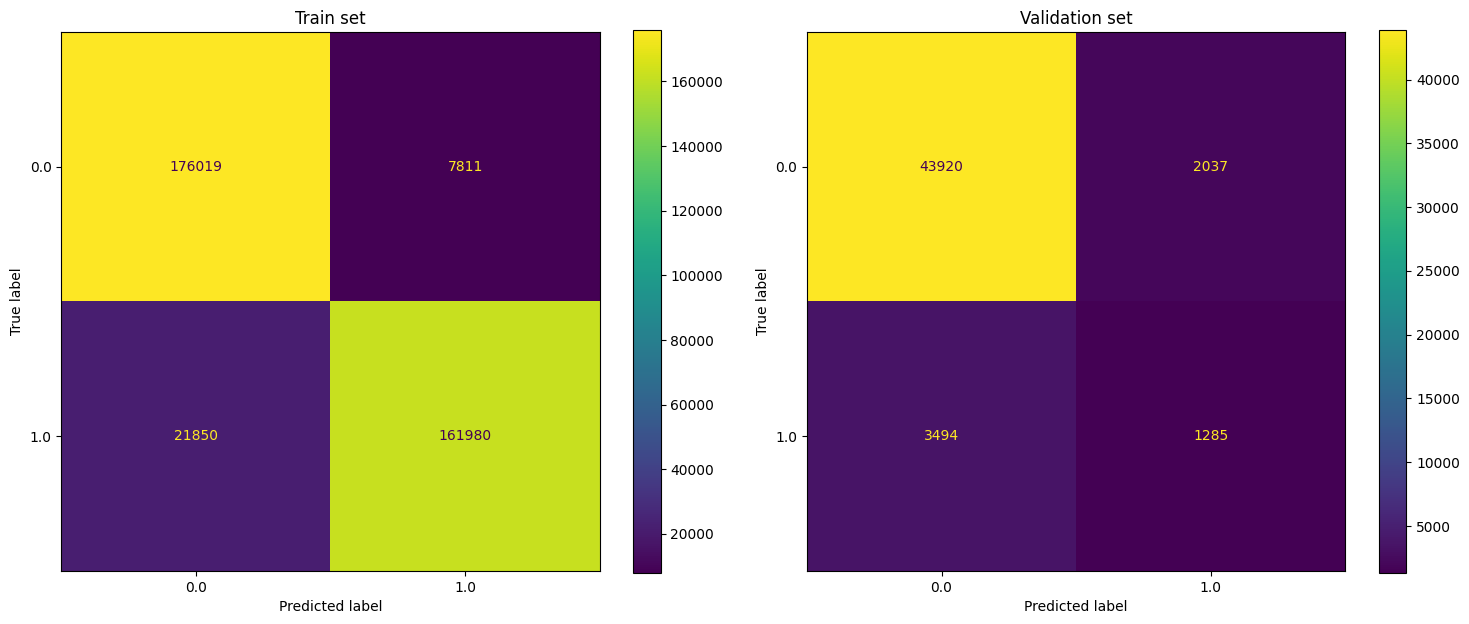

In [32]:
# train mô hình với alpha đã chọn
pruned_tree = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_alpha, class_weight='balanced')
pruned_tree.fit(X_train_scaled, y_train_smote1)

# độ sâu và số lá trước và sau khi tỉa
print("\nAfter pruning:")
print(f"Tree depth: {pruned_tree.get_depth()}")
print(f"Number of leaves: {pruned_tree.get_n_leaves()}")

# đánh giá model sau khi tỉa
y_pred_train = pruned_tree.predict(X_train_scaled)
y_pred_val = pruned_tree.predict(X_val_scaled)

print("\nModel performance after pruning:")
print('On train set:')
print(classification_report(y_train_smote1, y_pred_train))
print('\nOn validation set:')
print(classification_report(y_val1, y_pred_val))

# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15, 6))
ConfusionMatrixDisplay.from_predictions(y_train_smote1, y_pred_train, ax=ax[0])
ax[0].set_title('Train set')
ConfusionMatrixDisplay.from_predictions(y_val1, y_pred_val, ax=ax[1])
ax[1].set_title('Validation set')
plt.tight_layout()
plt.show()

##### PCA

No over-sampling:

In [12]:
pca = PCA(n_components=6)
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train1)
X_val_scaled = std_scaler.transform(X_val1)

X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

dtree = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
dtree.fit(X_train_pca, y_train1)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

Độ sâu của cây: 55
Số lượng lá: 25579


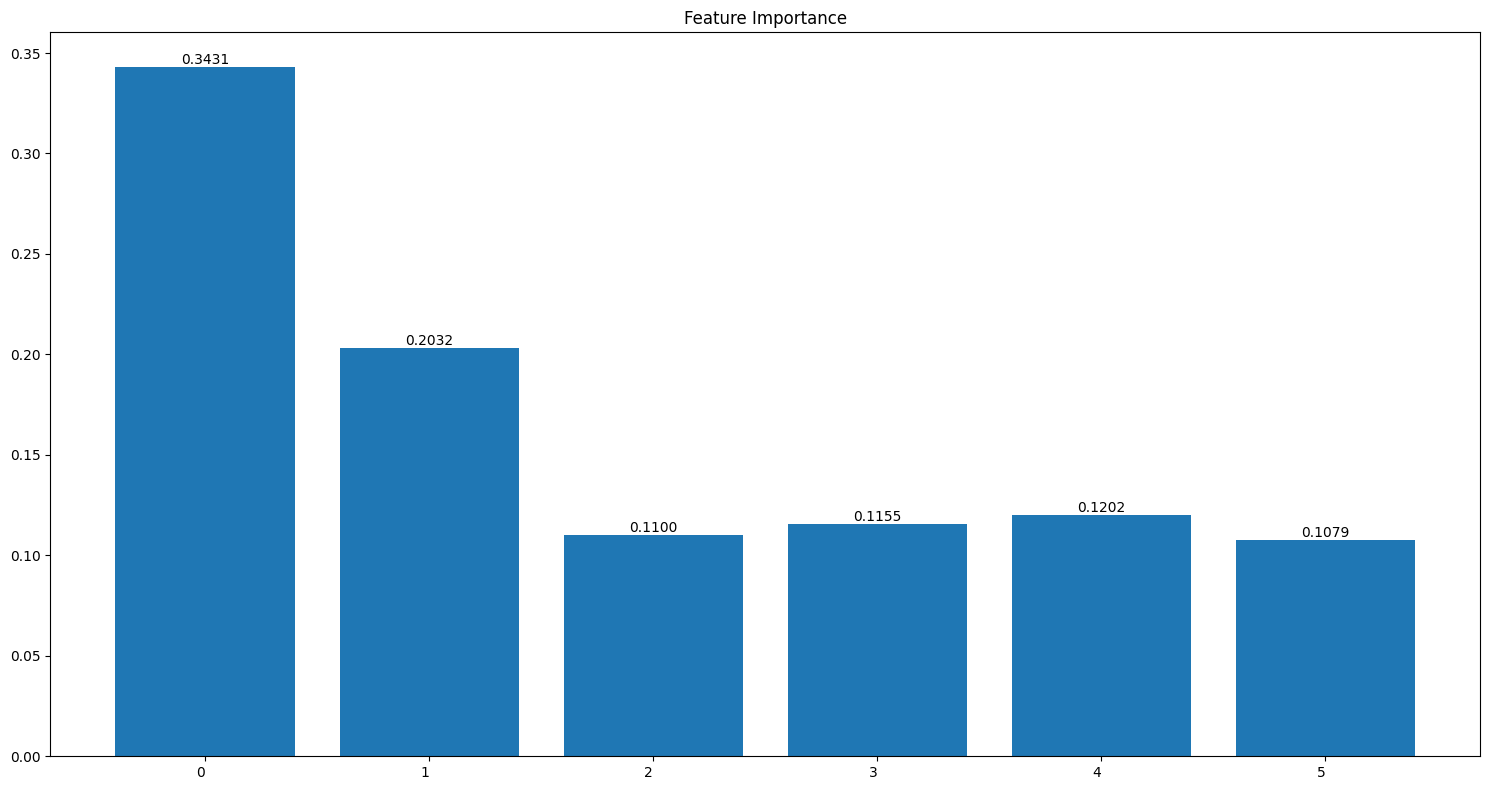

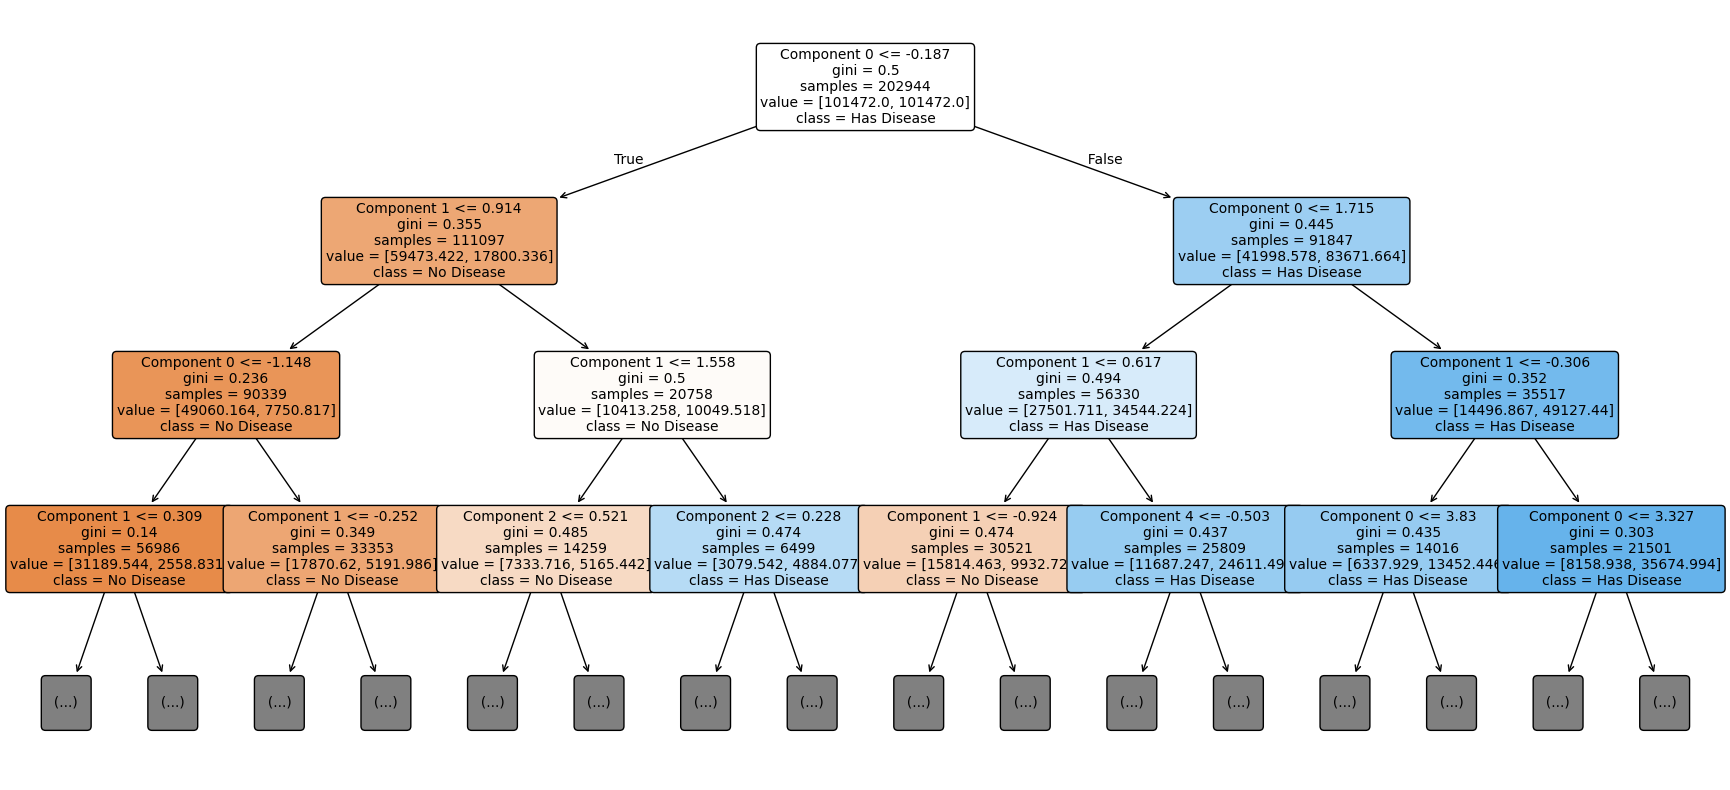

In [110]:
# độ sâu
print(f"Độ sâu của cây: {dtree.get_depth()}")

# số lá
print(f"Số lượng lá: {dtree.get_n_leaves()}")

# độ quan trọng của đặc trưng
feature_importance = pd.DataFrame({
    'feature': range(X_train_pca.shape[1]),
    'importance': dtree.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(15, 8))  # tăng kích thước để dễ nhìn hơn
bars = plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(ha='right')
plt.title('Feature Importance')

# Thêm giá trị số lên trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',  # hiển thị 4 chữ số thập phân
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# hiển thị cây, với một độ sâu nhất định
plt.figure(figsize=(22, 10))
plot_tree(dtree, 
          max_depth=3,  # chỉ hiển thị 3 level đầu tiên
          feature_names=[f'Component {i}' for i in range(X_train_pca.shape[1])],
          class_names=['No Disease', 'Has Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [111]:
# evaluate
y_pred_train1 = dtree.predict(X_train_pca)
print('On train set:')
print(classification_report(y_train1, y_pred_train1))

y_pred_val1 = dtree.predict(X_val_pca)
print('On test set:')
print(classification_report(y_val1, y_pred_val1))

On train set:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    183830
         1.0       0.93      1.00      0.96     19114

    accuracy                           0.99    202944
   macro avg       0.97      1.00      0.98    202944
weighted avg       0.99      0.99      0.99    202944

On test set:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     45957
         1.0       0.23      0.24      0.23      4779

    accuracy                           0.85     50736
   macro avg       0.58      0.58      0.58     50736
weighted avg       0.86      0.85      0.85     50736



In [7]:
dtree_full = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
path = dtree_full.cost_complexity_pruning_path(X_train_pca, y_train1)
alphas = path.ccp_alphas
alphas = alphas[alphas > 4e-5] # lọc bỏ những giá trị alpha âm hoặc quá nhỏ

# tìm alpha tối ưu bằng cross-validation
alpha_scores = []
depths = []
n_leaves = []
for alpha in alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, class_weight='balanced')
    scores = cross_val_score(tree, X_train_pca, y_train1, cv=5, scoring='f1', n_jobs=-1)
    alpha_scores.append(np.mean(scores))
    tree.fit(X_train_pca, y_train1)
    depths.append(tree.get_depth())
    n_leaves.append(tree.get_n_leaves())

# Chọn alpha tốt nhất
best_alpha = alphas[np.argmax(alpha_scores)]
print(f"Best alpha: {best_alpha}")

Best alpha: 0.0001387439745761691


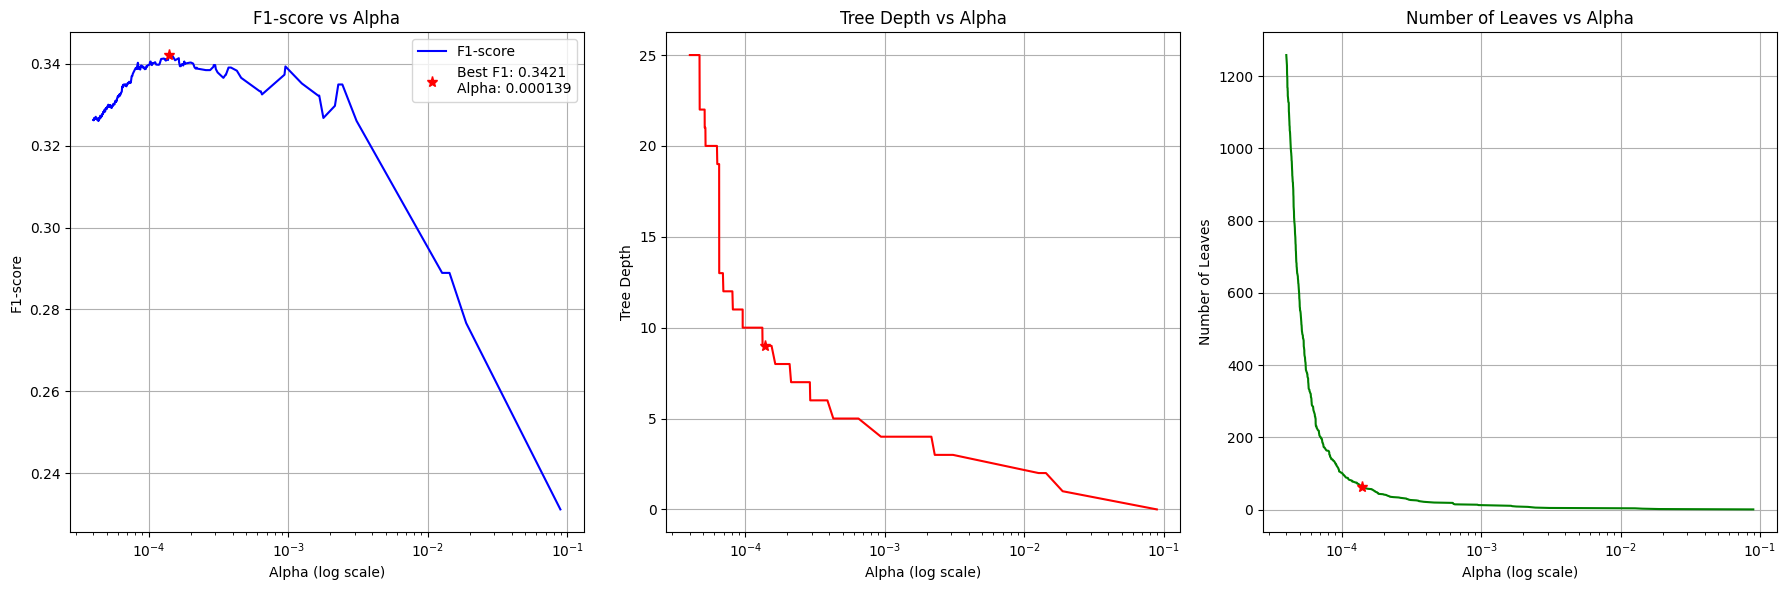

Best alpha: 0.0001387439745761691
Best F1-score: 0.3421
Corresponding depth: 9
Corresponding number of leaves: 64


In [8]:
# Tạo figure với 3 subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot F1-score với trục x log và đánh dấu điểm tối ưu
best_idx = np.argmax(alpha_scores)
ax1.semilogx(alphas, alpha_scores, 'b-', label='F1-score')
ax1.plot(alphas[best_idx], alpha_scores[best_idx], 'r*', markersize=8, 
         label=f'Best F1: {alpha_scores[best_idx]:.4f}\nAlpha: {alphas[best_idx]:.6f}')
ax1.set_xlabel('Alpha (log scale)')
ax1.set_ylabel('F1-score')
ax1.set_title('F1-score vs Alpha')
ax1.grid(True)
ax1.legend()

# Plot Tree depth với trục x log
ax2.semilogx(alphas, depths, 'r-')
ax2.plot(alphas[best_idx], depths[best_idx], 'r*', markersize=8)
ax2.set_xlabel('Alpha (log scale)')
ax2.set_ylabel('Tree Depth')
ax2.set_title('Tree Depth vs Alpha')
ax2.grid(True)

# Plot Number of leaves với trục x log
ax3.semilogx(alphas, n_leaves, 'g-')
ax3.plot(alphas[best_idx], n_leaves[best_idx], 'r*', markersize=8)
ax3.set_xlabel('Alpha (log scale)')
ax3.set_ylabel('Number of Leaves')
ax3.set_title('Number of Leaves vs Alpha')
ax3.grid(True)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

# In giá trị alpha tốt nhất và các metric tương ứng
print(f"Best alpha: {best_alpha}")
print(f"Best F1-score: {max(alpha_scores):.4f}")
print(f"Corresponding depth: {depths[np.argmax(alpha_scores)]}")
print(f"Corresponding number of leaves: {n_leaves[np.argmax(alpha_scores)]}")


After pruning:
Tree depth: 9
Number of leaves: 64

Model performance after pruning:
On train set:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83    183830
         1.0       0.23      0.79      0.35     19114

    accuracy                           0.73    202944
   macro avg       0.60      0.76      0.59    202944
weighted avg       0.90      0.73      0.78    202944


On validation set:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.82     45957
         1.0       0.22      0.78      0.34      4779

    accuracy                           0.72     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.72      0.78     50736



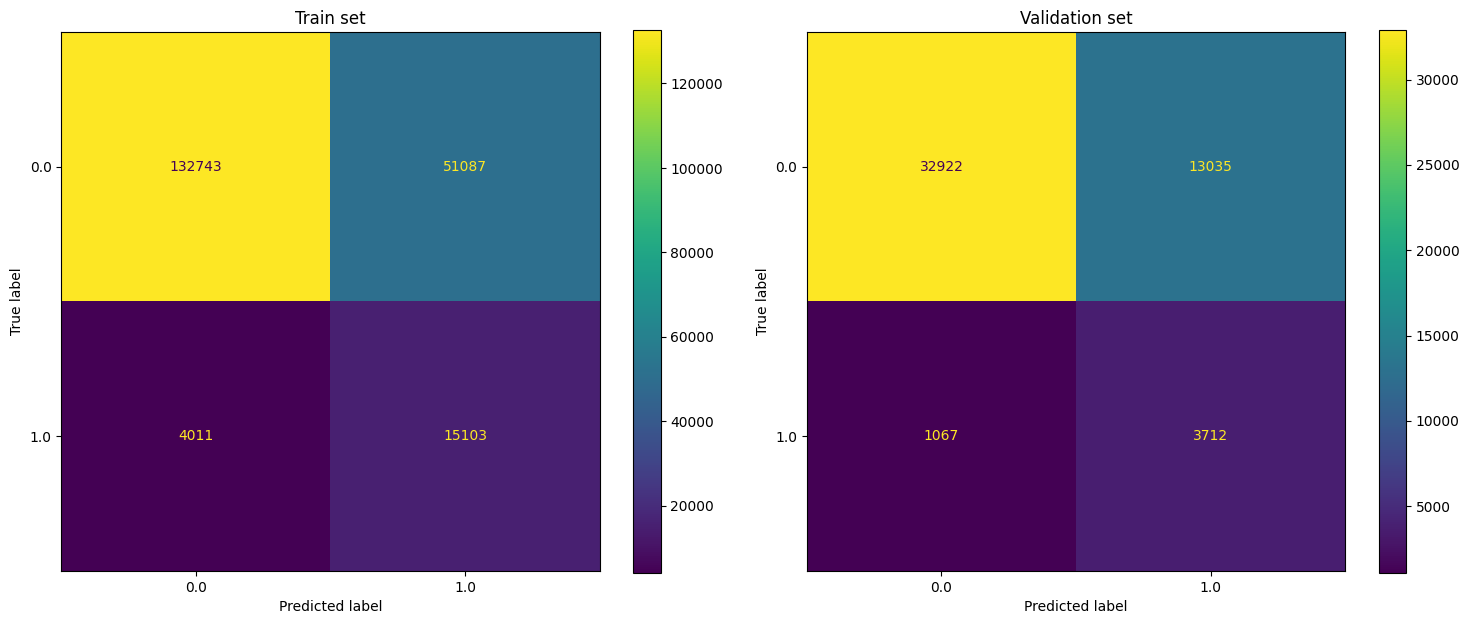

In [9]:
# train mô hình với alpha đã chọn
pruned_tree = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_alpha, class_weight='balanced')
pruned_tree.fit(X_train_pca, y_train1)

# độ sâu và số lá trước và sau khi tỉa
print("\nAfter pruning:")
print(f"Tree depth: {pruned_tree.get_depth()}")
print(f"Number of leaves: {pruned_tree.get_n_leaves()}")

# đánh giá model sau khi tỉa
y_pred_train = pruned_tree.predict(X_train_pca)
y_pred_val = pruned_tree.predict(X_val_pca)

print("\nModel performance after pruning:")
print('On train set:')
print(classification_report(y_train1, y_pred_train))
print('\nOn validation set:')
print(classification_report(y_val1, y_pred_val))

# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15, 6))
ConfusionMatrixDisplay.from_predictions(y_train1, y_pred_train, ax=ax[0])
ax[0].set_title('Train set')
ConfusionMatrixDisplay.from_predictions(y_val1, y_pred_val, ax=ax[1])
ax[1].set_title('Validation set')
plt.tight_layout()
plt.show()

Random over-sampling:

In [12]:
ros = RandomOverSampler(sampling_strategy='auto')
X_train_ros1, y_train_ros1 = ros.fit_resample(X_train_pca, y_train1)

In [14]:
dtree_full = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
path = dtree_full.cost_complexity_pruning_path(X_train_ros1, y_train_ros1)
alphas = path.ccp_alphas
alphas = alphas[alphas > 4e-5] # lọc bỏ những giá trị alpha âm hoặc quá nhỏ

# tìm alpha tối ưu bằng cross-validation
alpha_scores = []
depths = []
n_leaves = []
for alpha in alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, class_weight='balanced')
    scores = cross_val_score(tree, X_train_ros1, y_train_ros1, cv=5, scoring='f1', n_jobs=-1)
    alpha_scores.append(np.mean(scores))
    tree.fit(X_train_ros1, y_train_ros1)
    depths.append(tree.get_depth())
    n_leaves.append(tree.get_n_leaves())

# Chọn alpha tốt nhất
best_alpha = alphas[np.argmax(alpha_scores)]
print(f"Best alpha: {best_alpha}")

Best alpha: 4.000891426686297e-05


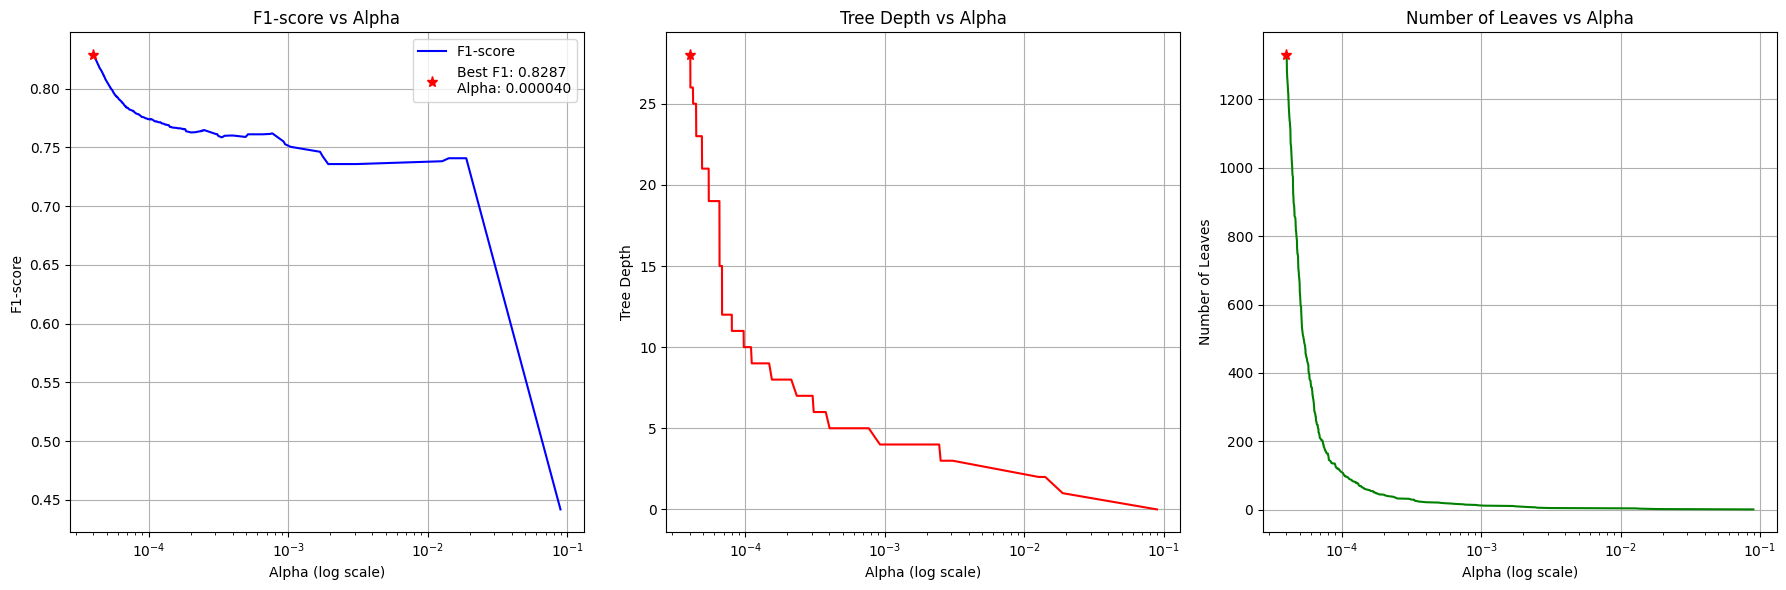

Best alpha: 4.000891426686297e-05
Best F1-score: 0.8287
Corresponding depth: 28
Corresponding number of leaves: 1330


In [15]:
# Tạo figure với 3 subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot F1-score với trục x log và đánh dấu điểm tối ưu
best_idx = np.argmax(alpha_scores)
ax1.semilogx(alphas, alpha_scores, 'b-', label='F1-score')
ax1.plot(alphas[best_idx], alpha_scores[best_idx], 'r*', markersize=8, 
         label=f'Best F1: {alpha_scores[best_idx]:.4f}\nAlpha: {alphas[best_idx]:.6f}')
ax1.set_xlabel('Alpha (log scale)')
ax1.set_ylabel('F1-score')
ax1.set_title('F1-score vs Alpha')
ax1.grid(True)
ax1.legend()

# Plot Tree depth với trục x log
ax2.semilogx(alphas, depths, 'r-')
ax2.plot(alphas[best_idx], depths[best_idx], 'r*', markersize=8)
ax2.set_xlabel('Alpha (log scale)')
ax2.set_ylabel('Tree Depth')
ax2.set_title('Tree Depth vs Alpha')
ax2.grid(True)

# Plot Number of leaves với trục x log
ax3.semilogx(alphas, n_leaves, 'g-')
ax3.plot(alphas[best_idx], n_leaves[best_idx], 'r*', markersize=8)
ax3.set_xlabel('Alpha (log scale)')
ax3.set_ylabel('Number of Leaves')
ax3.set_title('Number of Leaves vs Alpha')
ax3.grid(True)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

# In giá trị alpha tốt nhất và các metric tương ứng
print(f"Best alpha: {best_alpha}")
print(f"Best F1-score: {max(alpha_scores):.4f}")
print(f"Corresponding depth: {depths[np.argmax(alpha_scores)]}")
print(f"Corresponding number of leaves: {n_leaves[np.argmax(alpha_scores)]}")


After pruning:
Tree depth: 28
Number of leaves: 1330

Model performance after pruning:
On train set:
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.80    183830
         1.0       0.77      0.92      0.84    183830

    accuracy                           0.82    367660
   macro avg       0.83      0.82      0.82    367660
weighted avg       0.83      0.82      0.82    367660


On validation set:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     45957
         1.0       0.21      0.75      0.33      4779

    accuracy                           0.71     50736
   macro avg       0.59      0.73      0.57     50736
weighted avg       0.89      0.71      0.77     50736



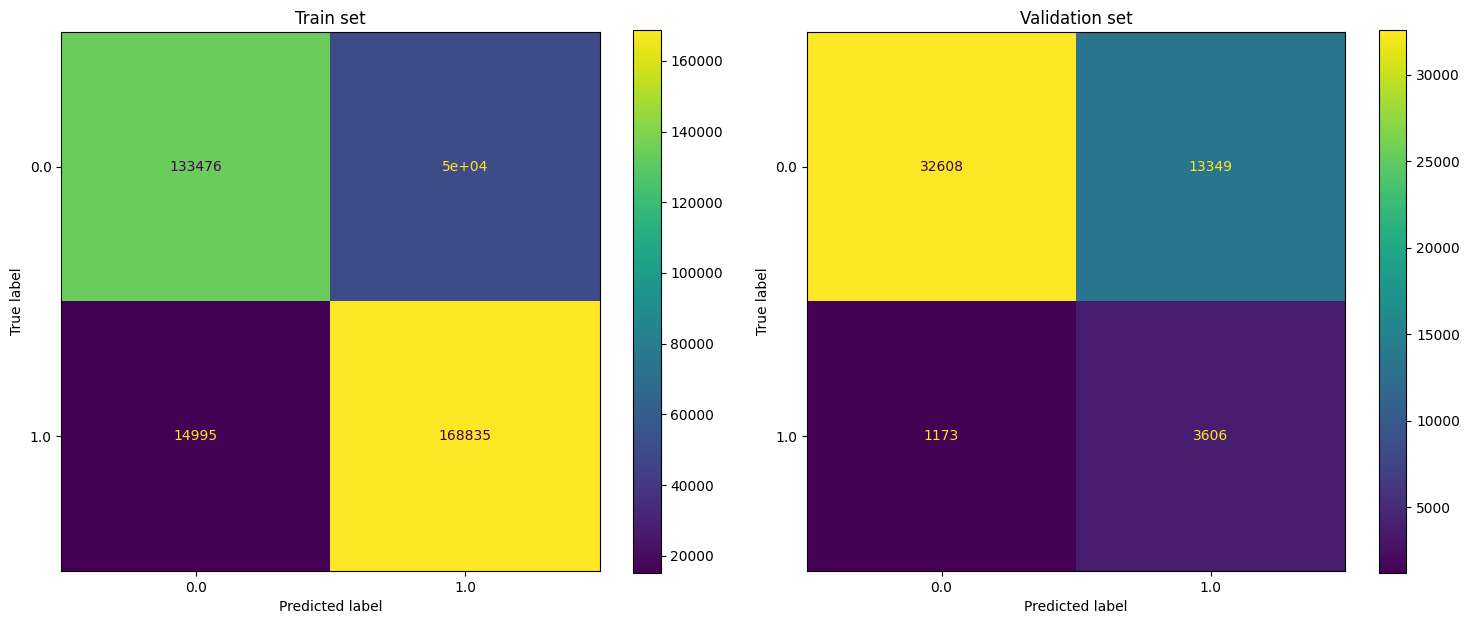

In [16]:
# train mô hình với alpha đã chọn
pruned_tree = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_alpha, class_weight='balanced')
pruned_tree.fit(X_train_ros1, y_train_ros1)

# độ sâu và số lá trước và sau khi tỉa
print("\nAfter pruning:")
print(f"Tree depth: {pruned_tree.get_depth()}")
print(f"Number of leaves: {pruned_tree.get_n_leaves()}")

# đánh giá model sau khi tỉa
y_pred_train = pruned_tree.predict(X_train_ros1)
y_pred_val = pruned_tree.predict(X_val_pca)

print("\nModel performance after pruning:")
print('On train set:')
print(classification_report(y_train_ros1, y_pred_train))
print('\nOn validation set:')
print(classification_report(y_val1, y_pred_val))

# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15, 6))
ConfusionMatrixDisplay.from_predictions(y_train_ros1, y_pred_train, ax=ax[0])
ax[0].set_title('Train set')
ConfusionMatrixDisplay.from_predictions(y_val1, y_pred_val, ax=ax[1])
ax[1].set_title('Validation set')
plt.tight_layout()
plt.show()

SMOTE:

In [13]:
smote = SMOTE(sampling_strategy='auto')
X_train_smote1, y_train_smote1 = smote.fit_resample(X_train_pca, y_train1)

In [14]:
dtree_full = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')
path = dtree_full.cost_complexity_pruning_path(X_train_smote1, y_train_smote1)
alphas = path.ccp_alphas
alphas = alphas[alphas > 4e-5] # lọc bỏ những giá trị alpha âm hoặc quá nhỏ

# tìm alpha tối ưu bằng cross-validation
alpha_scores = []
depths = []
n_leaves = []
for alpha in alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, class_weight='balanced')
    scores = cross_val_score(tree, X_train_smote1, y_train_smote1, cv=5, scoring='f1', n_jobs=-1)
    alpha_scores.append(np.mean(scores))
    tree.fit(X_train_smote1, y_train_smote1)
    depths.append(tree.get_depth())
    n_leaves.append(tree.get_n_leaves())

# Chọn alpha tốt nhất
best_alpha = alphas[np.argmax(alpha_scores)]
print(f"Best alpha: {best_alpha}")

Best alpha: 4.0097782514525405e-05


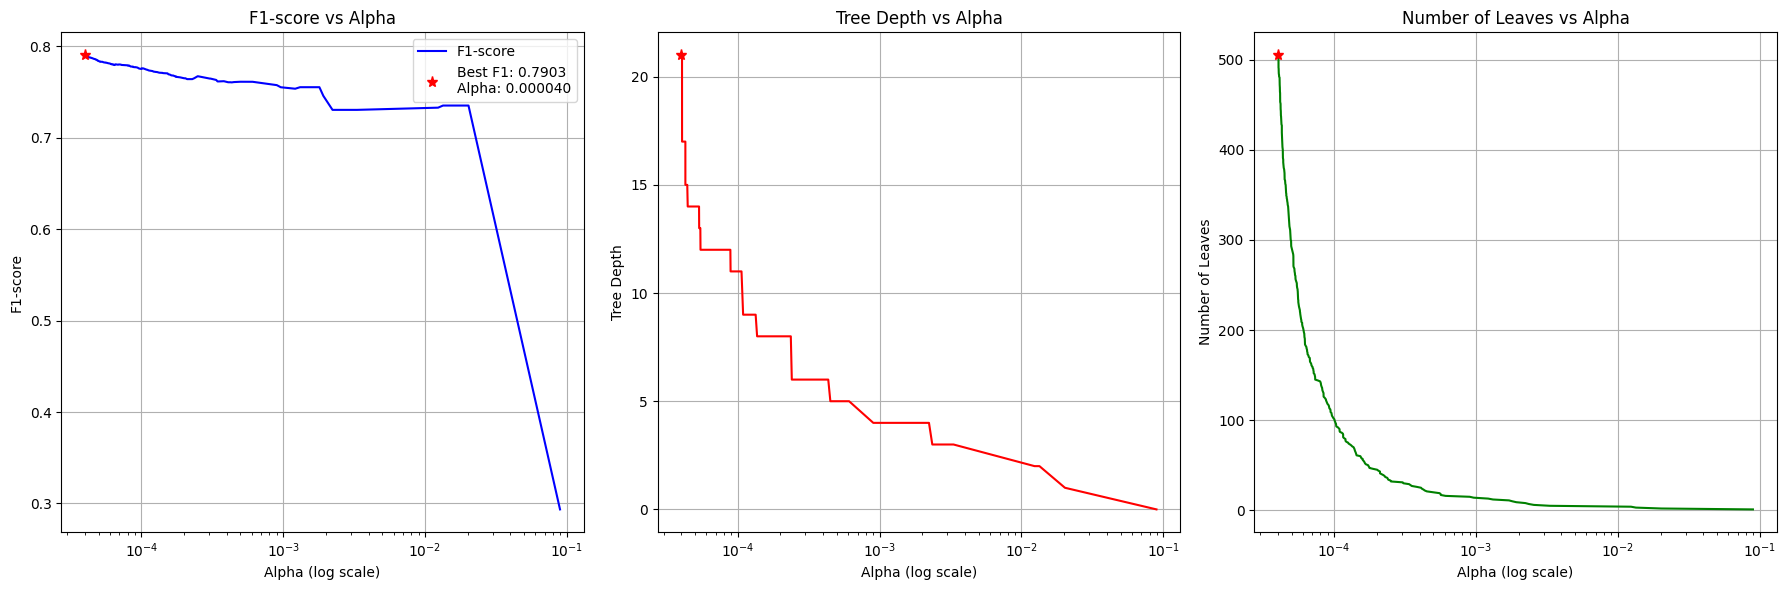

Best alpha: 4.0097782514525405e-05
Best F1-score: 0.7903
Corresponding depth: 21
Corresponding number of leaves: 505


In [15]:
# Tạo figure với 3 subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot F1-score với trục x log và đánh dấu điểm tối ưu
best_idx = np.argmax(alpha_scores)
ax1.semilogx(alphas, alpha_scores, 'b-', label='F1-score')
ax1.plot(alphas[best_idx], alpha_scores[best_idx], 'r*', markersize=8, 
         label=f'Best F1: {alpha_scores[best_idx]:.4f}\nAlpha: {alphas[best_idx]:.6f}')
ax1.set_xlabel('Alpha (log scale)')
ax1.set_ylabel('F1-score')
ax1.set_title('F1-score vs Alpha')
ax1.grid(True)
ax1.legend()

# Plot Tree depth với trục x log
ax2.semilogx(alphas, depths, 'r-')
ax2.plot(alphas[best_idx], depths[best_idx], 'r*', markersize=8)
ax2.set_xlabel('Alpha (log scale)')
ax2.set_ylabel('Tree Depth')
ax2.set_title('Tree Depth vs Alpha')
ax2.grid(True)

# Plot Number of leaves với trục x log
ax3.semilogx(alphas, n_leaves, 'g-')
ax3.plot(alphas[best_idx], n_leaves[best_idx], 'r*', markersize=8)
ax3.set_xlabel('Alpha (log scale)')
ax3.set_ylabel('Number of Leaves')
ax3.set_title('Number of Leaves vs Alpha')
ax3.grid(True)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

# In giá trị alpha tốt nhất và các metric tương ứng
print(f"Best alpha: {best_alpha}")
print(f"Best F1-score: {max(alpha_scores):.4f}")
print(f"Corresponding depth: {depths[np.argmax(alpha_scores)]}")
print(f"Corresponding number of leaves: {n_leaves[np.argmax(alpha_scores)]}")


After pruning:
Tree depth: 21
Number of leaves: 505

Model performance after pruning:
On train set:
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77    183830
         1.0       0.75      0.85      0.80    183830

    accuracy                           0.78    367660
   macro avg       0.79      0.78      0.78    367660
weighted avg       0.79      0.78      0.78    367660


On validation set:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     45957
         1.0       0.21      0.77      0.34      4779

    accuracy                           0.71     50736
   macro avg       0.59      0.74      0.58     50736
weighted avg       0.90      0.71      0.77     50736



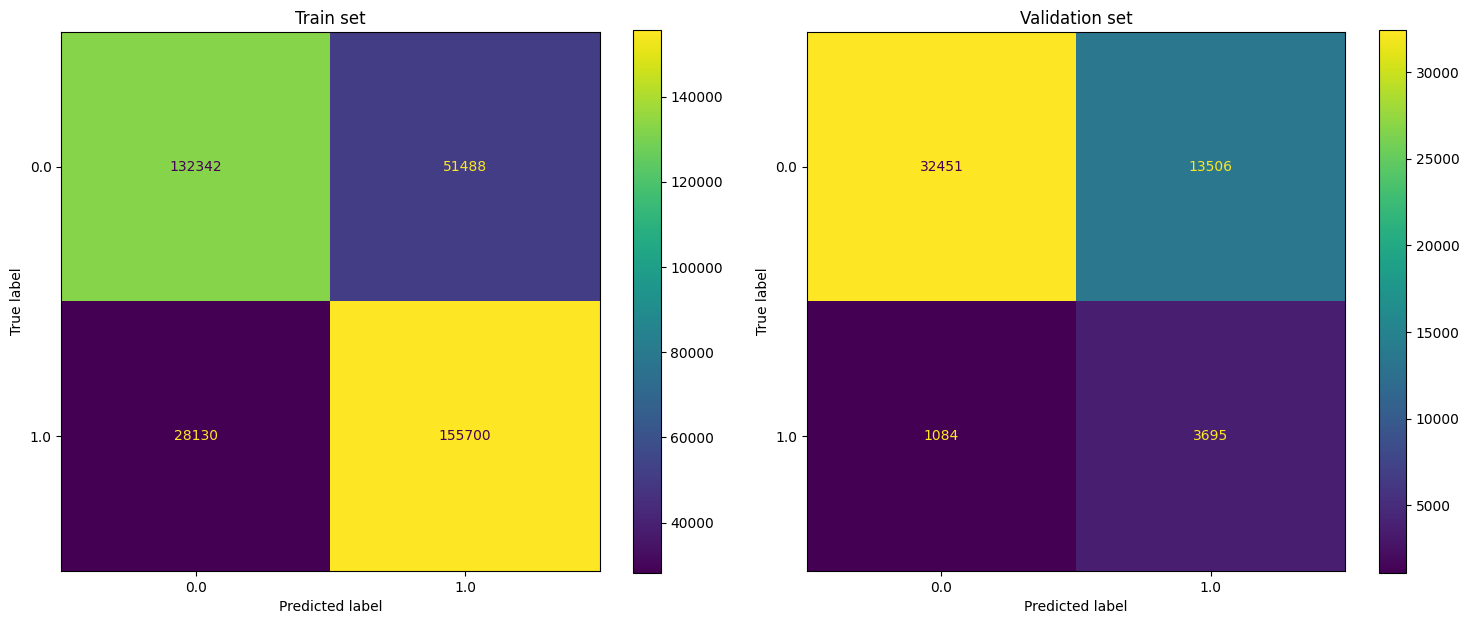

In [16]:
# train mô hình với alpha đã chọn
pruned_tree = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_alpha, class_weight='balanced')
pruned_tree.fit(X_train_smote1, y_train_smote1)

# độ sâu và số lá trước và sau khi tỉa
print("\nAfter pruning:")
print(f"Tree depth: {pruned_tree.get_depth()}")
print(f"Number of leaves: {pruned_tree.get_n_leaves()}")

# đánh giá model sau khi tỉa
y_pred_train = pruned_tree.predict(X_train_smote1)
y_pred_val = pruned_tree.predict(X_val_pca)

print("\nModel performance after pruning:")
print('On train set:')
print(classification_report(y_train_smote1, y_pred_train))
print('\nOn validation set:')
print(classification_report(y_val1, y_pred_val))

# confusion matrix
fig, ax = plt.subplots(1,2, figsize=(15, 6))
ConfusionMatrixDisplay.from_predictions(y_train_smote1, y_pred_train, ax=ax[0])
ax[0].set_title('Train set')
ConfusionMatrixDisplay.from_predictions(y_val1, y_pred_val, ax=ax[1])
ax[1].set_title('Validation set')
plt.tight_layout()
plt.show()

#### 

##### 2.2. Chuyển về bài toán hồi quy

In [6]:
std_scaler = StandardScaler()
X_normalized = std_scaler.fit_transform(X)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_normalized, y)
y_cont = lin_svm.decision_function(X_normalized)
y_cont.shape

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(253680,)

Train test split:

In [7]:
# 80% train 20% val
X_trainc1, X_valc1, y_trainc1, y_valc1 = train_test_split(X_normalized, y_cont, train_size=0.8, random_state=42)
# 70% train 30% val
X_trainc2, X_valc2, y_trainc2, y_valc2 = train_test_split(X_normalized, y_cont, train_size=0.7, random_state=42)
# 60% train 40% val
X_trainc3, X_valc3, y_trainc3, y_valc3 = train_test_split(X_normalized, y_cont, train_size=0.6, random_state=42)

Decision tree regressor:

In [91]:
dtree = DecisionTreeRegressor(criterion='squared_error', random_state=42)
dtree.fit(X_trainc1, y_trainc1)

DecisionTreeRegressor(random_state=42)

Độ sâu của cây: 12
Số lượng lá: 633


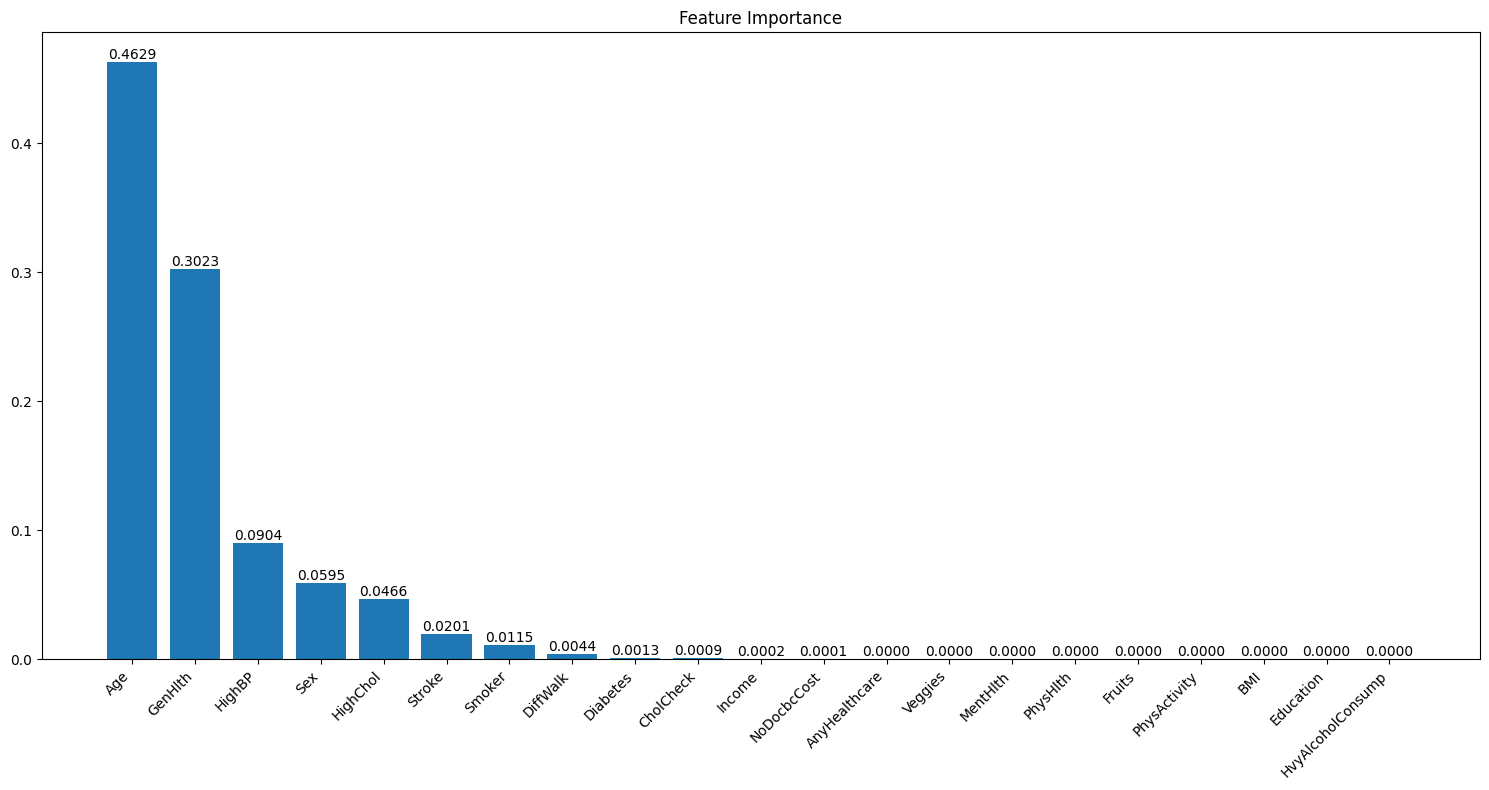

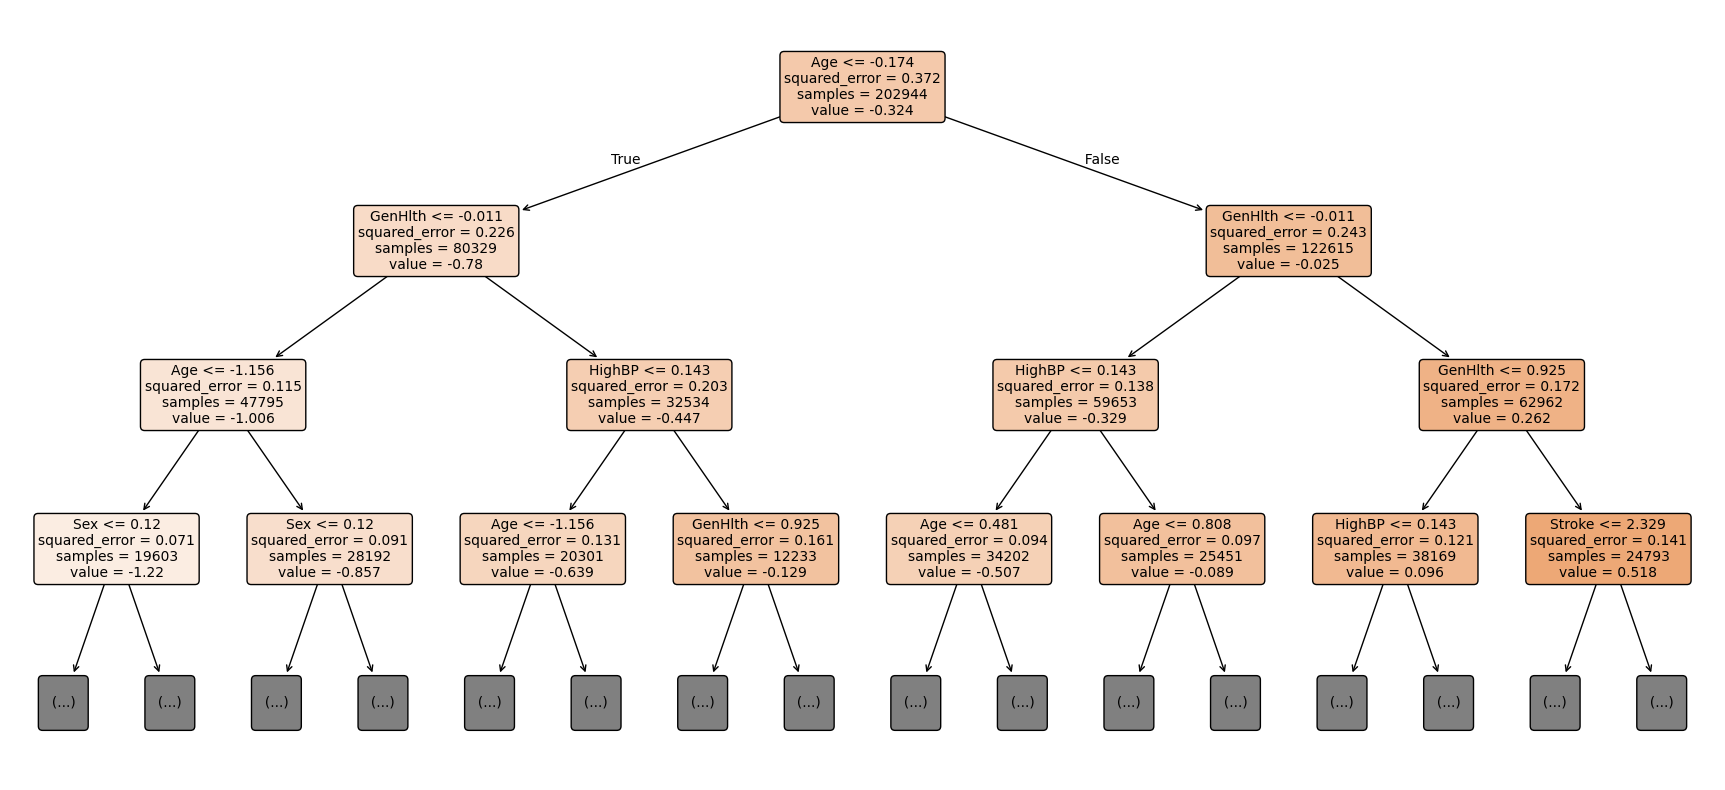

In [89]:
# độ sâu
print(f"Độ sâu của cây: {dtree.get_depth()}")

# số lá
print(f"Số lượng lá: {dtree.get_n_leaves()}")

# độ quan trọng của đặc trưng
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dtree.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(15, 8))  # tăng kích thước để dễ nhìn hơn
bars = plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')

# Thêm giá trị số lên trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',  # hiển thị 4 chữ số thập phân
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# hiển thị cây, với một độ sâu nhất định
plt.figure(figsize=(22, 10))
plot_tree(dtree, 
          max_depth=3,  # chỉ hiển thị 3 level đầu tiên
          feature_names=X.columns,
          class_names=['No Disease', 'Has Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [90]:
y_pred_train = dtree.predict(X_trainc1)
y_pred_val = dtree.predict(X_valc1)

print('On train set:')
print(f'MSE: {mean_squared_error(y_trainc1, y_pred_train)}')
print(f'R2: {r2_score(y_trainc1, y_pred_train)}')

print('On val set:')
print(f'MSE: {mean_squared_error(y_valc1, y_pred_val)}')
print(f'R2: {r2_score(y_valc1, y_pred_val)}')


On train set:
MSE: 0.0106110081576603
R2: 0.971478339804666
On val set:
MSE: 0.010742275497206638
R2: 0.9711958671081851


Thực hiện trên dữ liệu giảm chiều:

In [8]:
pca = PCA(n_components=X_trainc1.shape[1] // 3)
X_train_pca = pca.fit_transform(X_trainc1)
X_val_pca = pca.transform(X_valc1)

dtree = DecisionTreeRegressor(criterion='squared_error', random_state=42)
dtree.fit(X_train_pca, y_trainc1)

DecisionTreeRegressor(random_state=42)

Độ sâu của cây: 38
Số lượng lá: 185023


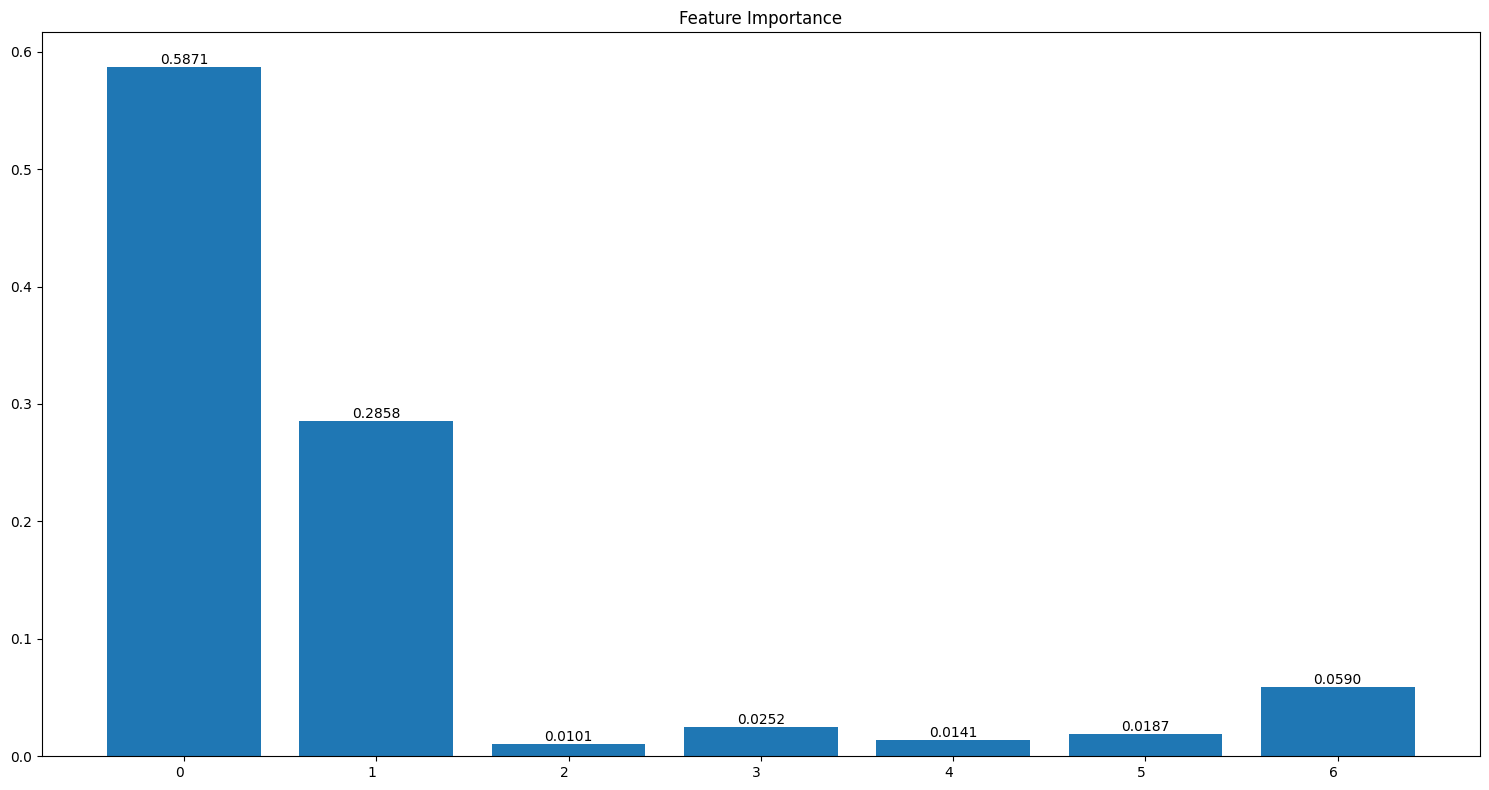

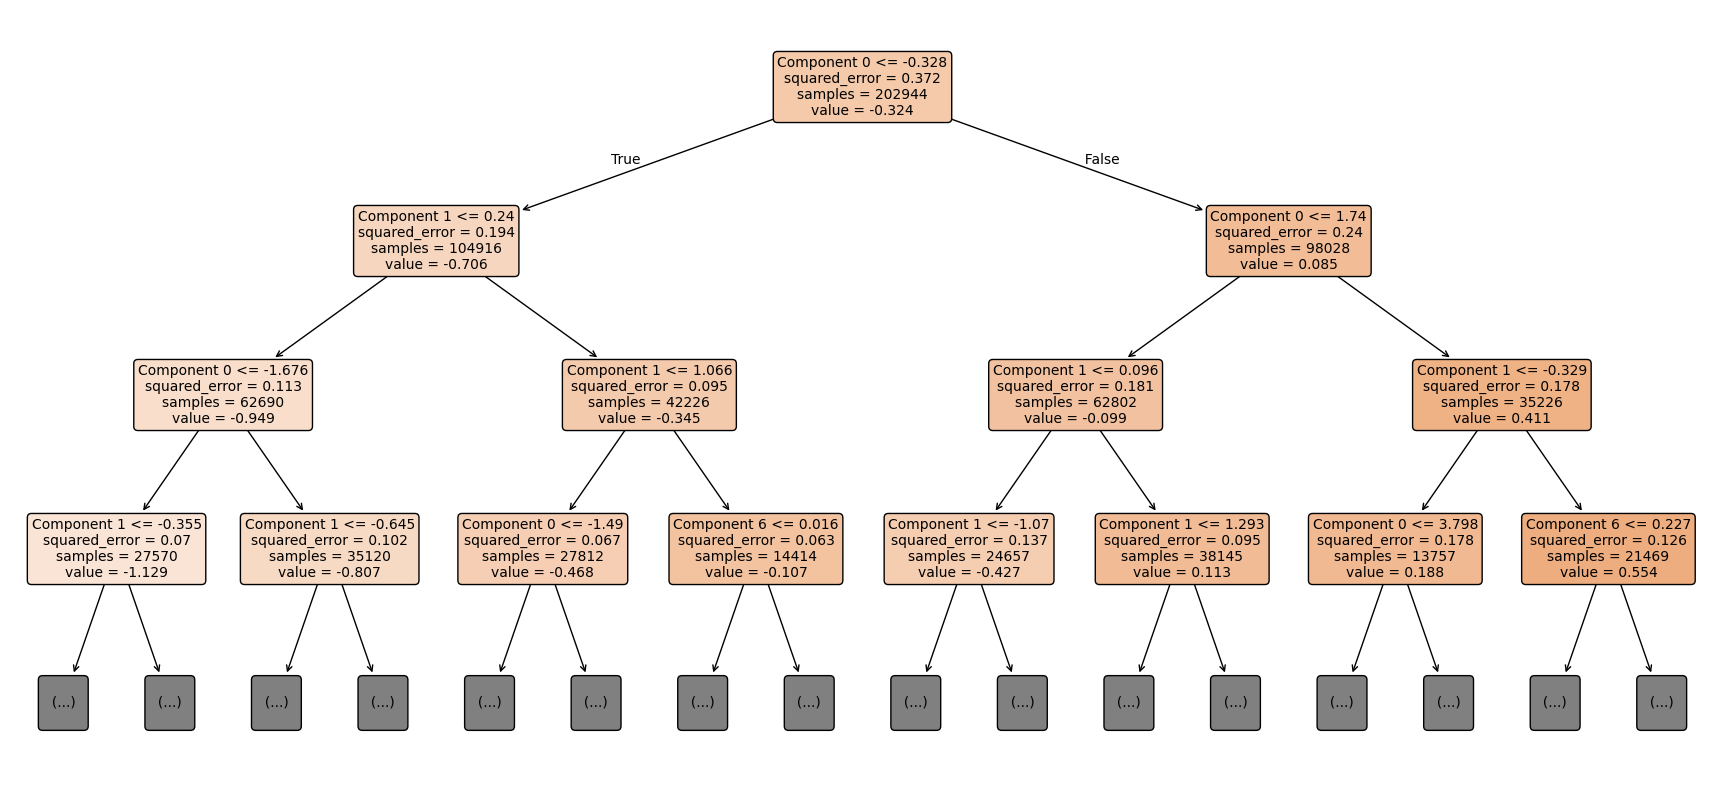

In [80]:
# độ sâu
print(f"Độ sâu của cây: {dtree.get_depth()}")

# số lá
print(f"Số lượng lá: {dtree.get_n_leaves()}")

# độ quan trọng của đặc trưng
feature_importance = pd.DataFrame({
    'feature': range(X_train_pca.shape[1]),
    'importance': dtree.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(15, 8))  # tăng kích thước để dễ nhìn hơn
bars = plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(ha='right')
plt.title('Feature Importance')

# Thêm giá trị số lên trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',  # hiển thị 4 chữ số thập phân
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# hiển thị cây, với một độ sâu nhất định
plt.figure(figsize=(22, 10))
plot_tree(dtree, 
          max_depth=3,  # chỉ hiển thị 3 level đầu tiên
          feature_names=[f'Component {i}' for i in range(X_train_pca.shape[1])],
          class_names=['No Disease', 'Has Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [81]:
y_pred_train = dtree.predict(X_train_pca)
y_pred_val = dtree.predict(X_val_pca)

print('On train set:')
print(f'MSE: {mean_squared_error(y_trainc1, y_pred_train)}')
print(f'R2: {r2_score(y_trainc1, y_pred_train)}')

print('On val set:')
print(f'MSE: {mean_squared_error(y_valc1, y_pred_val)}')
print(f'R2: {r2_score(y_valc1, y_pred_val)}')


On train set:
MSE: 2.4734732112123375e-33
R2: 1.0
On val set:
MSE: 0.030366335282226584
R2: 0.9185762870134815
